**IMPORTACIÓN DE LIBERIAS**

In [1]:
# Importación de librería
# -------------------------------------------------------------------------------------------------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de Pandas
# -------------------------------------------------------------------------------------------------------
pd.set_option('display.max_columns', None) # Para visualizar todas las columnas de los DataFrame
sns.set(style="whitegrid", palette="muted", font_scale=1.1) # Configuración del estilo de los gráficos

# 📊 PROYECTO EDA CON PYTHON

En este notebook se va a realizar un análisis exploratorio de datos (EDA) utilizando dos datasets proporcionados:

1. **bank-additional.csv** → información de campañas de marketing de un banco portugués.
2. **customers-details.xlsx** → información demográfica y de comportamiento de clientes.

El análisis se va a dividir en tres fases:

- **EDA de bank**
- **EDA de customers**
- **EDA combinado (merge de ambos datasets)**

# ______________________________________________________________________
**CARGA DE DATOS**

In [2]:
# Dataset principal (campaña de marketing)
# -------------------------------------------------------------------------------------------------------
bank = pd.read_csv("bank-additional.csv", decimal=",", index_col= 0)

bank.head()

,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,date,latitude,longitude,id_
0,NaN,housemaid,MARRIED,basic.4y,0.0,0.0,0.0,telephone,261,1,999,0,NONEXISTENT,1.1,93.994,-36.4,4.857,5191.0,no,2-agosto-2019,41.495,-71.233,089b39d8-e4d0-461b-87d4-814d71e0e079
1,57.0,services,MARRIED,high.school,NaN,0.0,0.0,telephone,149,1,999,0,NONEXISTENT,1.1,93.994,-36.4,NaN,5191.0,no,14-septiembre-2016,34.601,-83.923,e9d37224-cb6f-4942-98d7-46672963d097
2,37.0,services,MARRIED,high.school,0.0,1.0,0.0,telephone,226,1,999,0,NONEXISTENT,1.1,93.994,-36.4,4.857,5191.0,no,15-febrero-2019,34.939,-94.847,3f9f49b5-e410-4948-bf6e-f9244f04918b
3,40.0,admin.,MARRIED,basic.6y,0.0,0.0,0.0,telephone,151,1,999,0,NONEXISTENT,1.1,93.994,-36.4,NaN,5191.0,no,29-noviembre-2015,49.041,-70.308,9991fafb-4447-451a-8be2-b0df6098d13e
4,56.0,services,MARRIED,high.school,0.0,0.0,1.0,telephone,307,1,999,0,NONEXISTENT,1.1,93.994,-36.4,NaN,5191.0,no,29-enero-2017,38.033,-104.463,eca60b76-70b6-4077-80ba-bc52e8ebb0eb


In [125]:
print(f"El número de filas para bank es {bank.shape[0]}, y el número de columnas es {bank.shape[1]}")

El número de filas para bank es 37871, y el número de columnas es 19


## 🔹 EDA DE 'bank'

In [5]:
# Detectar variables binarias (solo 0 y 1) y cambiarlas a Si/No
# -------------------------------------------------------------------------------------------------------
binarias = ['default', 'housing', 'loan']
for col in binarias:
    bank[col] = pd.to_numeric(bank[col], errors="coerce").astype("Int64") # Convertir a numérico (maneja '0.0', '1.0' y NaN)
    bank[col] = bank[col].map({1: "Sí", 0: "No"})  # Crear versión categórica Sí/No (NaN se conserva)

In [19]:
# Información general del dataset 'bank'
# -------------------------------------------------------------------------------------------------------
bank.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43000 entries, 0 to 27570
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   age             37880 non-null  Int64         
 1   job             43000 non-null  object        
 2   marital         43000 non-null  object        
 3   education       43000 non-null  object        
 4   default         43000 non-null  object        
 5   housing         43000 non-null  object        
 6   loan            43000 non-null  object        
 7   contact         43000 non-null  object        
 8   duration        43000 non-null  int64         
 9   campaign        43000 non-null  int64         
 10  pdays           43000 non-null  int64         
 11  previous        43000 non-null  int64         
 12  poutcome        43000 non-null  object        
 13  emp.var.rate    43000 non-null  float64       
 14  cons.price.idx  42529 non-null  float64       
 15  cons.co

In [18]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'duration', 'campaign', 'pdays', 'previous', 'poutcome',
       'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'y',
       'date'],
      dtype='object')

**DESCRIPCIÓN DE LAS COLUMNAS**

- **age:** La edad del cliente
- **job:** La ocupación o profesión del cliente
- **marital:** El estado civil del cliente
- **education:** El nivel educativo del cliente
- **default:** Indica si el cliente tiene algún historial de incumplimiento de pagos (1: Sí, 0: No)
- **housing:** Indica si el cliente tiene un préstamo hipotecario (1: Si. 0:No)
- **loan:** Indica si el cliento tiene algún otro tipo de préstamo (1: Sí, 0:No)
- **contact:** El método de contacto utilizado para comunicarsse con el cliente
- **duration:** La duración de contactos realizados durante esta campaña para este cliente
- **pdays:** Número de días que han pasado desde la última vez que se contactó con el cliente durante esta campaña
- **previous:** Número de veces que se han contactado con el cliente antes de esta campaña
- **Poutcome:** Resultado de la campaña de marketing anterior
- **emp.var.rate:** La tasa de variación del empleo
- **cons.price.idx:** El índice de precios al consumidor
- **cons.conf.idx:** El índice de confianza del consumidor
- **euribor3m:** La tasa de interés de referencia a tres meses
- **nr.employed:** El número de empleados
- **y:** Indica si el cliente ha suscrito un produccto o servicio (Sí/No)
- **date:** La fecha en la que se realizó la interacción con el cliente
- **contact_month:** Mes en el que se realizó la interacción con el cliente durante la campaña de marketing
- **id_:** Un identificador único para cada registro en el dataset

**LIMPIEZA Y TRANSFORMACIÓN**

In [8]:
# Con el resultado de información general se detecta que 'age' no se ha cargado correctamente
# -------------------------------------------------------------------------------------------------------

# 1. Se limpia strings y se convierte a numérico
bank['age'] = pd.to_numeric(bank['age'], errors="coerce")

# 2. Quitar decimales inncesarios convirtiendo a entero
bank['age'] = bank['age'].astype('Int64')


print("Tipo de dato:", bank["age"].dtype)
print("Nulos en age:", bank["age"].isnull().sum())
print(bank["age"].describe())

Tipo de dato: Int64
Nulos en age: 5120
count      37880.0
mean     39.977112
std      10.437957
min           17.0
25%           32.0
50%           38.0
75%           47.0
max           98.0
Name: age, dtype: Float64


In [9]:
# Corregir variable que aparece como categórica cuando tendría que ser numérica
# -------------------------------------------------------------------------------------------------------
bank["emp.var.rate"] = pd.to_numeric(bank["emp.var.rate"], errors="coerce")

In [12]:
# Detectar todas las columnas categóricas (objecto string)
# -------------------------------------------------------------------------------------------------------
categoricas = bank.select_dtypes(include=["object"]).columns

# Filtramos solo las que tienen NaN
# -------------------------------------------------------------------------------------------------------
categoricas_con_nan = [col for col in categoricas if bank[col].isna().sum() > 0]

print("Columnas categorizad con NaN detectadas:", categoricas_con_nan)

# Reemplazar NaN por "Desconocido"
# -------------------------------------------------------------------------------------------------------
for col in categoricas_con_nan:
    bank[col] = bank[col].fillna("Desconocido")

Columnas categorizad con NaN detectadas: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'date']


In [13]:
# Comprobamos que no haya ningún duplicado
# -------------------------------------------------------------------------------------------------------
bank.duplicated().sum()

np.int64(0)

In [14]:
# Eliminamos los posibles duplicados que haya
# -------------------------------------------------------------------------------------------------------
bank.drop_duplicates(inplace=True)

In [15]:
# Identificación de Nulos en %
# -------------------------------------------------------------------------------------------------------
print("Nulos por columna:\n", bank.isnull().mean() * 100)

Nulos por columna:
 age               11.906977
job                0.000000
marital            0.000000
education          0.000000
default            0.000000
housing            0.000000
loan               0.000000
contact            0.000000
duration           0.000000
campaign           0.000000
pdays              0.000000
previous           0.000000
poutcome           0.000000
emp.var.rate       0.000000
cons.price.idx     1.095349
cons.conf.idx      0.000000
euribor3m         21.525581
nr.employed        0.000000
y                  0.000000
date               0.000000
latitude           0.000000
longitude          0.000000
id_                0.000000
dtype: float64


In [16]:
# Eliminamos las columnas que no nos aprontan datos para el análisis
# -------------------------------------------------------------------------------------------------------
bank = bank.drop(columns=['nr.employed', 'id_', 'latitude', 'longitude'])

In [17]:
# Conversión de fechas del dataset bank
# -------------------------------------------------------------------------------------------------------
meses = {
    "enero": "01", "febrero": "02", "marzo": "03", "abril": "04", "mayo": "05", "junio": "06", 
    "julio": "07", "agosto": "08", "septiembre": "09", "setiembre": "09", "octubre": "10", 
    "noviembre": "11", "diciembre": "12"
}

def convertir_fecha(fecha_str):
    """Convierte fechas con meses en español o inglés a datetime"""
    fecha = str(fecha_str).lower()

    for mes, num in meses.items(): # Reemplazar meses en español por números
        if mes in fecha:
            fecha = fecha.replace(mes, num)
            return pd.to_datetime(fecha, format="%d-%m-%Y", errors="coerce")
    
    return pd.to_datetime(fecha, dayfirst=True, errors="coerce") # Si no hay mes en español, intentar parseo directo

if "date" in bank.columns:
    bank["date"] = bank["date"].apply(convertir_fecha)


bank[["date"]].head()

,date
0,2019-08-02
1,2016-09-14
2,2019-02-15
3,2015-11-29
4,2017-01-29


# **IDENTIFICAR VARIABLES NUMÉRICAS Y CATEGÓRICAS**

In [20]:
# Identificamos las variables numéricas 
# -------------------------------------------------------------------------------------------------------
num_cols_bank = bank.select_dtypes(include=["int64", "float64"]).columns

print("Variables numéricas bank:\n\n", num_cols_bank)

Variables numéricas bank:

 Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m'],
      dtype='object')


In [21]:
# Identificamos las variables categóricas 
# -------------------------------------------------------------------------------------------------------
cat_cols_bank = bank.select_dtypes(include=['object']).columns

print("Variables categóricas bank:\n\n", cat_cols_bank)

Variables categóricas bank:

 Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'poutcome', 'y'],
      dtype='object')


# **ANÁLISIS DESCRIPTIVO** 

**VARIABLES NUMÉRICAS**

**Estadísticas descriptivas de bank**

In [22]:
bank.describe().T.round(2)

,count,mean,min,25%,50%,75%,max,std
age,37880.0,39.977112,17.0,32.0,38.0,47.0,98.0,10.437957
duration,43000.0,257.739279,0.0,102.0,179.0,319.0,4918.0,258.666033
campaign,43000.0,2.567233,1.0,1.0,2.0,3.0,56.0,2.772294
pdays,43000.0,962.330953,0.0,999.0,999.0,999.0,999.0,187.260394
previous,43000.0,0.174023,0.0,0.0,0.0,0.0,7.0,0.497366
emp.var.rate,43000.0,0.077128,-3.4,-1.8,1.1,1.4,1.4,1.573898
cons.price.idx,42529.0,93.574219,92.201,93.075,93.749,93.994,94.767,0.579548
cons.conf.idx,43000.0,-40.509049,-50.8,-42.7,-41.8,-36.4,-26.9,4.637186
euribor3m,33744.0,3.616521,0.634,1.344,4.857,4.961,5.045,1.737117
date,42752,2017-07-01 19:55:11.676646656,2015-01-01 00:00:00,2016-04-01 00:00:00,2017-07-04 00:00:00,2018-10-01 06:00:00,2019-12-31 00:00:00,NaN


**Visualizaciones**

Graficar histogramas para variables numéricas

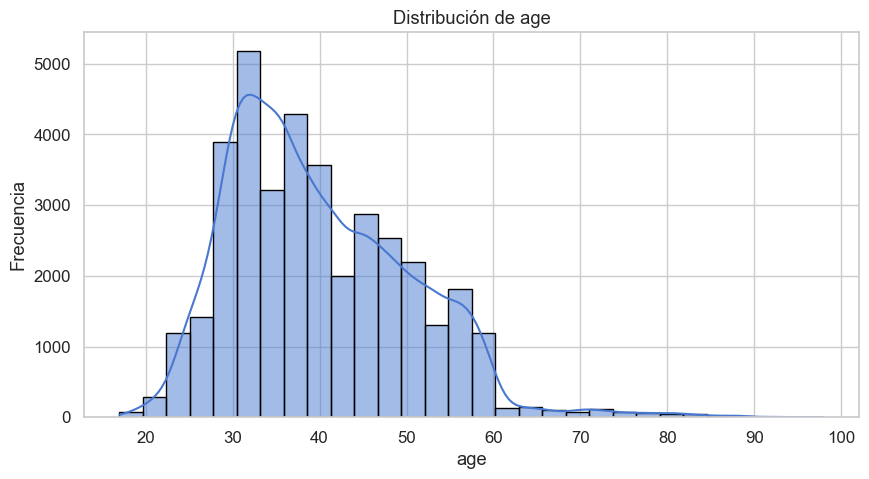

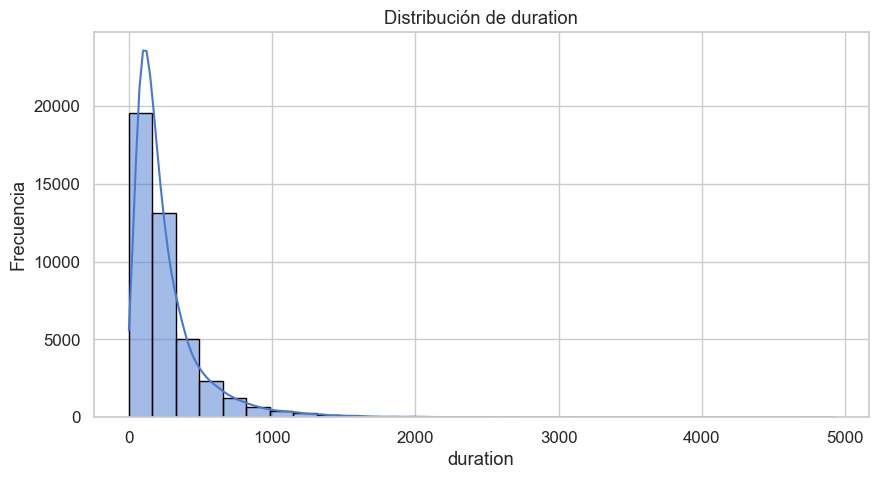

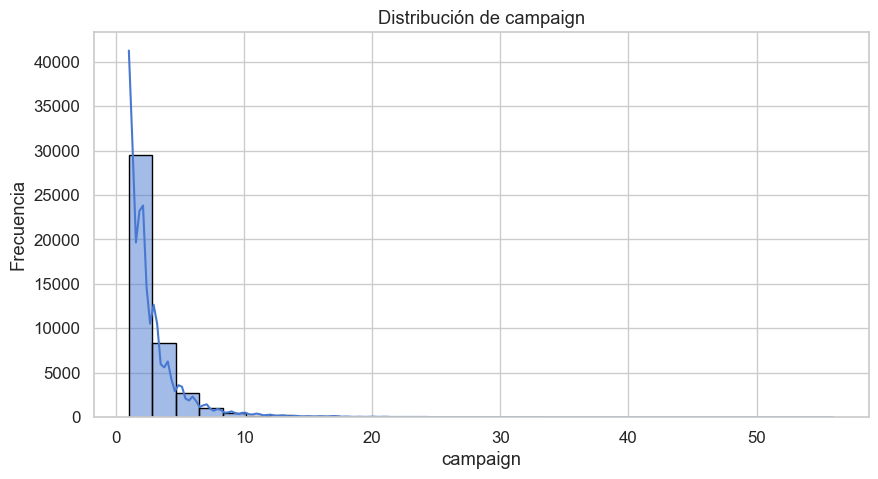

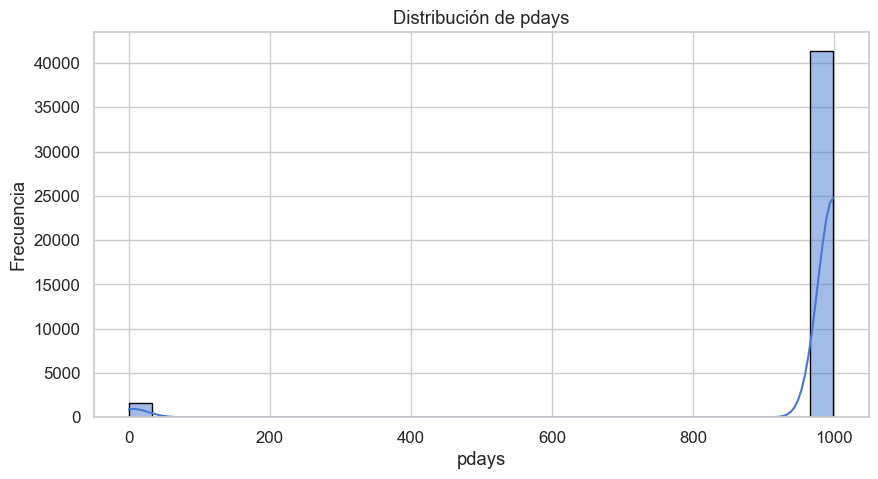

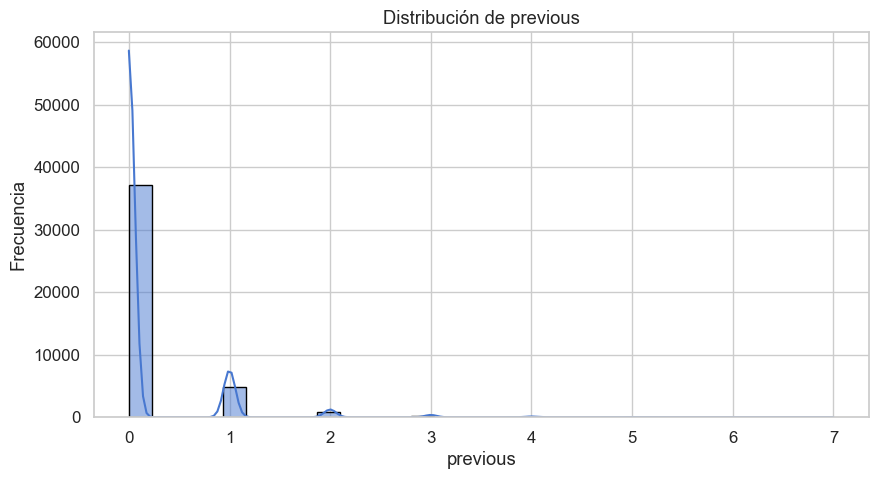

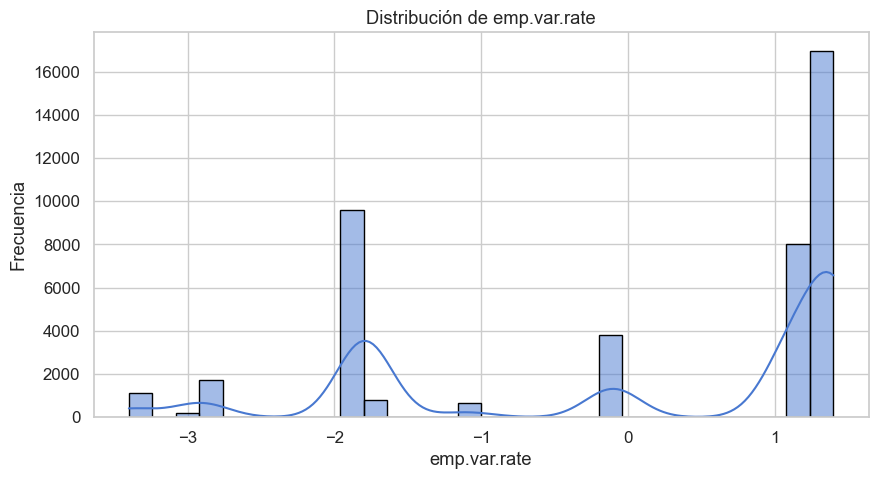

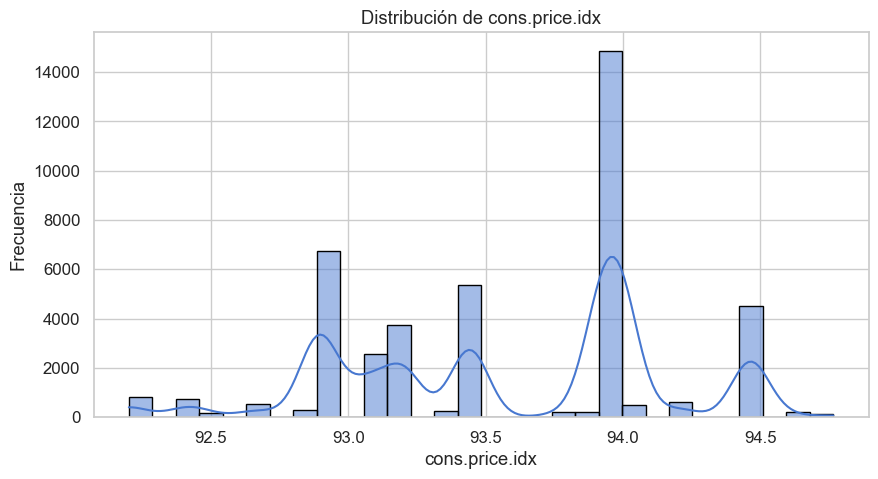

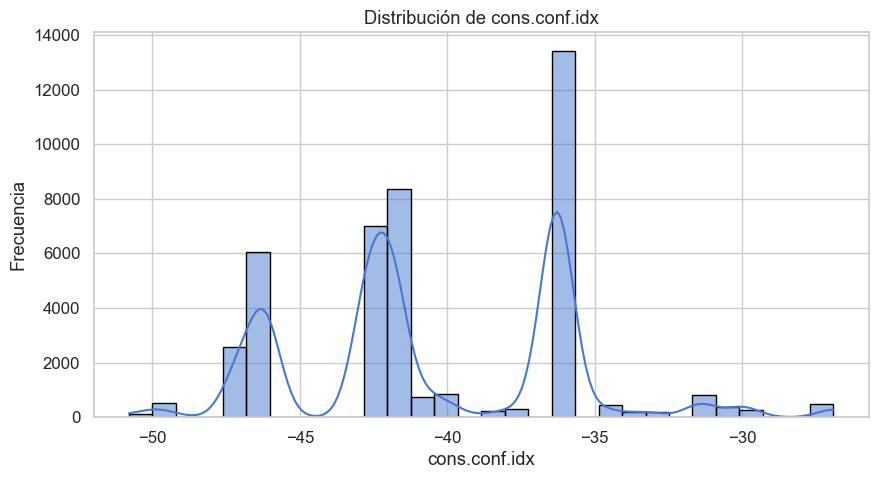

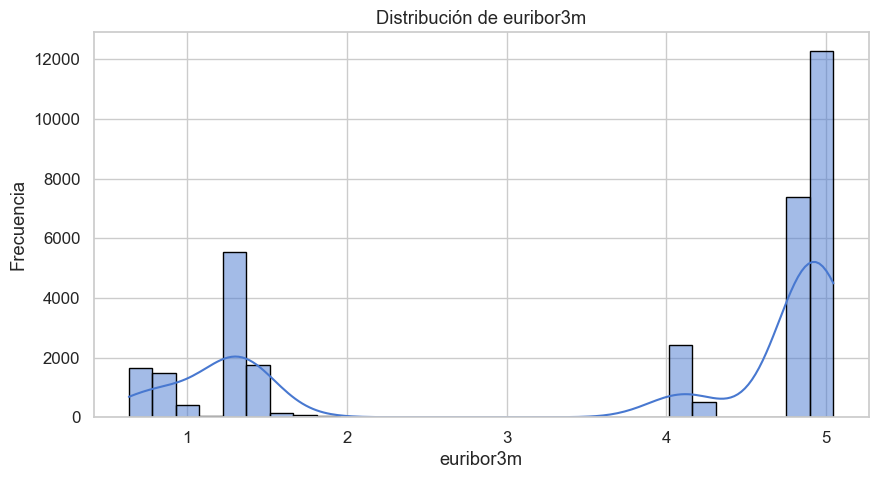

In [23]:
for col in num_cols_bank:
    plt.figure(figsize=(10, 5))
    sns.histplot(bank[col], bins=30, edgecolor='black', kde=True)

    plt.title(f"Distribución de {col}")
    plt.xlabel(col)
    plt.ylabel('Frecuencia')

    plt.show()

**VARIABLES CATEGÓRICAS**

**Estadísticas descriptivas**

In [24]:
bank.describe(include="object").T

,count,unique,top,freq
job,43000,12,admin.,10873
marital,43000,4,MARRIED,25999
education,43000,8,university.degree,12722
default,43000,3,No,34016
housing,43000,3,Sí,22498
loan,43000,3,No,35442
contact,43000,2,cellular,27396
poutcome,43000,3,NONEXISTENT,37103
y,43000,2,no,38156


**Valores únicos y frecuencias**

In [25]:
#cat_cols_bank = [col for col in bank.select_dtypes(include=["object"]).columns if col != "id_"]

for col in cat_cols_bank:
    print(f" \n---------- ESTAMOS ANALIZANDO LA COLUMNA: '{col}' -------------------\n")
    print(f"Valores únicos: {bank[col].unique()}\n")
    print("Frecuencias de los valores únicos de las categorías:")
    display(bank[col].value_counts())

 
---------- ESTAMOS ANALIZANDO LA COLUMNA: 'job' -------------------

Valores únicos: ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'Desconocido' 'entrepreneur'
 'student']

Frecuencias de los valores únicos de las categorías:


job
admin.           10873
blue-collar       9654
technician        7026
services          4162
management        3050
retired           1790
entrepreneur      1522
self-employed     1489
housemaid         1123
unemployed        1063
student            903
Desconocido        345
Name: count, dtype: int64

 
---------- ESTAMOS ANALIZANDO LA COLUMNA: 'marital' -------------------

Valores únicos: ['MARRIED' 'SINGLE' 'DIVORCED' 'Desconocido']

Frecuencias de los valores únicos de las categorías:


marital
MARRIED        25999
SINGLE         12105
DIVORCED        4811
Desconocido       85
Name: count, dtype: int64

 
---------- ESTAMOS ANALIZANDO LA COLUMNA: 'education' -------------------

Valores únicos: ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'Desconocido' 'university.degree' 'illiterate']

Frecuencias de los valores únicos de las categorías:


education
university.degree      12722
high.school             9925
basic.9y                6309
professional.course     5477
basic.4y                4356
basic.6y                2386
Desconocido             1807
illiterate                18
Name: count, dtype: int64

 
---------- ESTAMOS ANALIZANDO LA COLUMNA: 'default' -------------------

Valores únicos: ['No' 'Desconocido' 'Sí']

Frecuencias de los valores únicos de las categorías:


default
No             34016
Desconocido     8981
Sí                 3
Name: count, dtype: int64

 
---------- ESTAMOS ANALIZANDO LA COLUMNA: 'housing' -------------------

Valores únicos: ['No' 'Sí' 'Desconocido']

Frecuencias de los valores únicos de las categorías:


housing
Sí             22498
No             19476
Desconocido     1026
Name: count, dtype: int64

 
---------- ESTAMOS ANALIZANDO LA COLUMNA: 'loan' -------------------

Valores únicos: ['No' 'Sí' 'Desconocido']

Frecuencias de los valores únicos de las categorías:


loan
No             35442
Sí              6532
Desconocido     1026
Name: count, dtype: int64

 
---------- ESTAMOS ANALIZANDO LA COLUMNA: 'contact' -------------------

Valores únicos: ['telephone' 'cellular']

Frecuencias de los valores únicos de las categorías:


contact
cellular     27396
telephone    15604
Name: count, dtype: int64

 
---------- ESTAMOS ANALIZANDO LA COLUMNA: 'poutcome' -------------------

Valores únicos: ['NONEXISTENT' 'FAILURE' 'SUCCESS']

Frecuencias de los valores únicos de las categorías:


poutcome
NONEXISTENT    37103
FAILURE         4461
SUCCESS         1436
Name: count, dtype: int64

 
---------- ESTAMOS ANALIZANDO LA COLUMNA: 'y' -------------------

Valores únicos: ['no' 'yes']

Frecuencias de los valores únicos de las categorías:


y
no     38156
yes     4844
Name: count, dtype: int64

**Visualizaciones**

Graficar gráficos de barras para variables categóricas

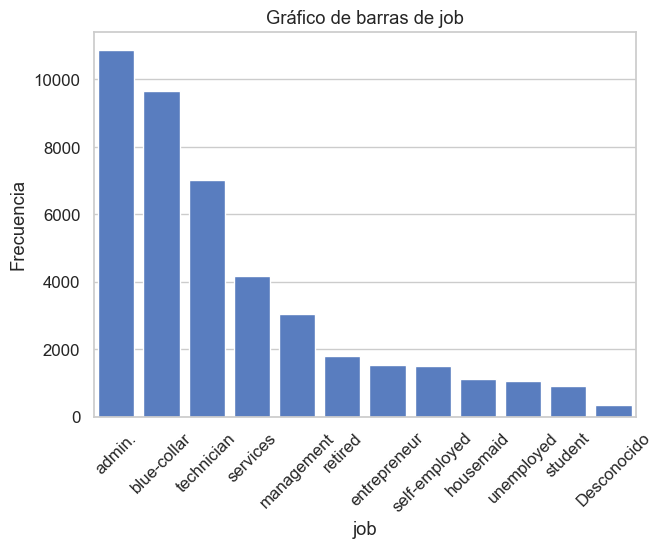

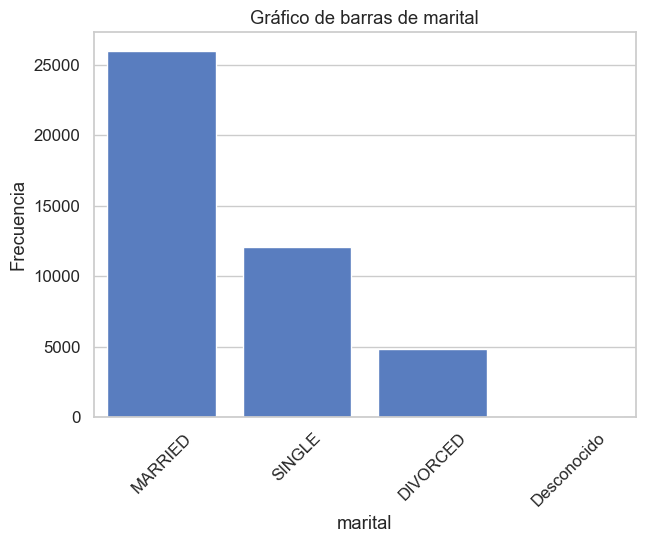

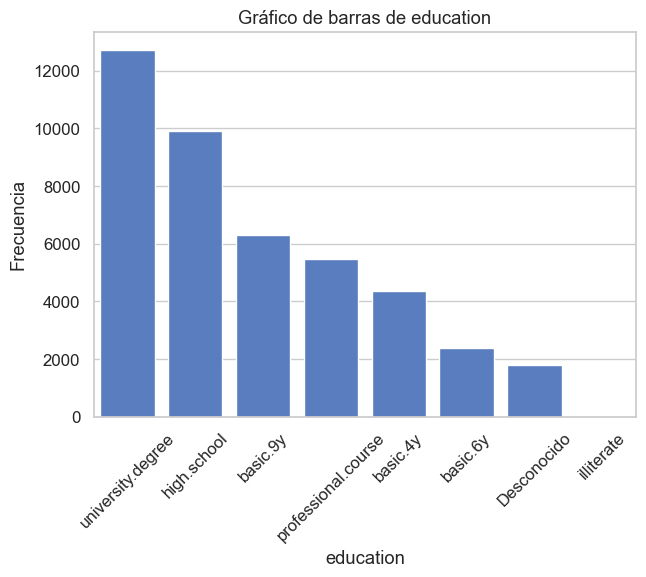

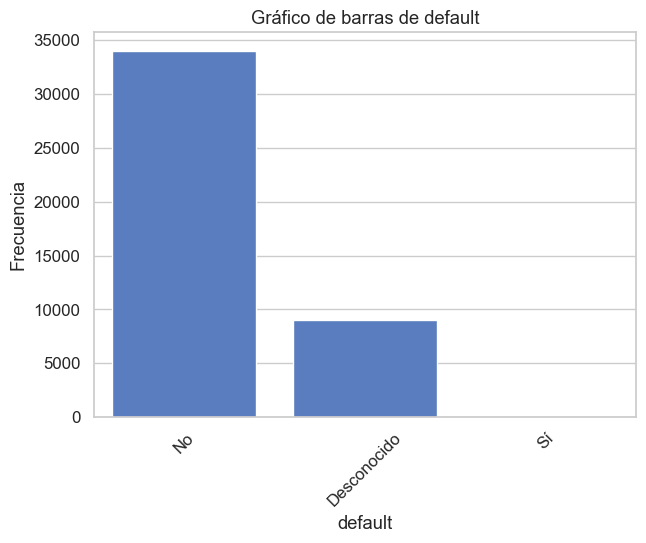

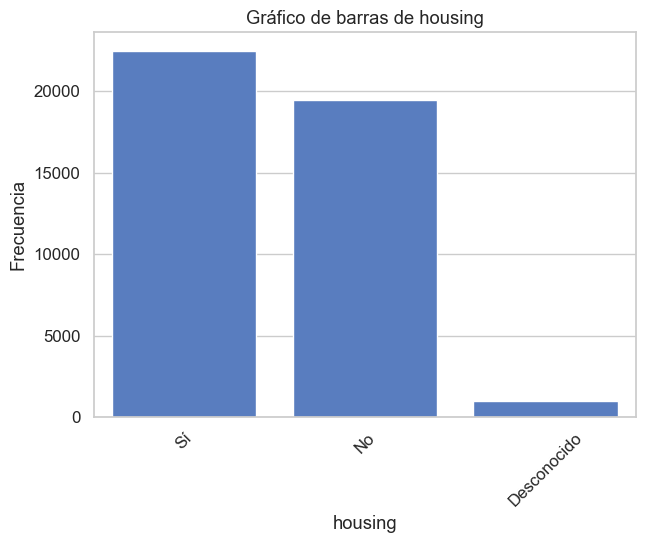

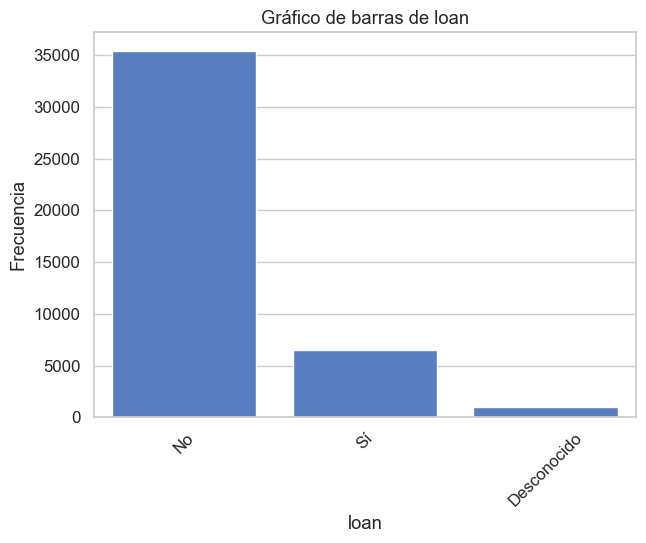

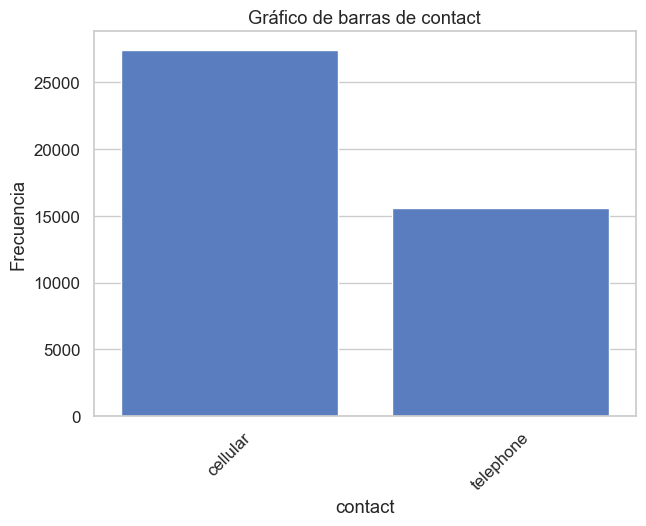

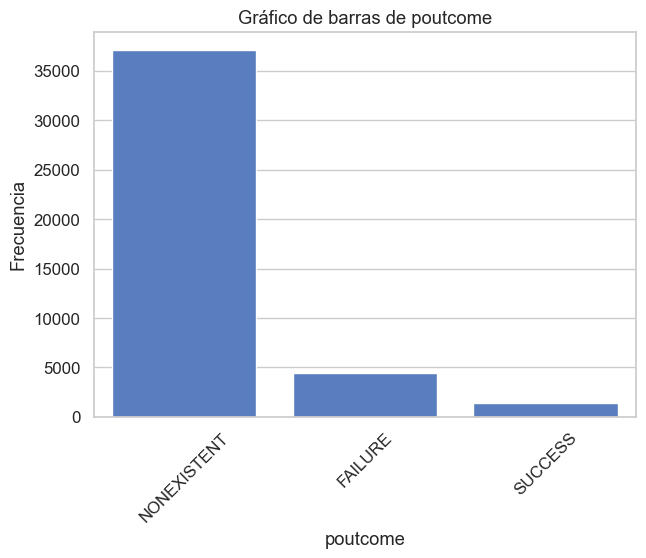

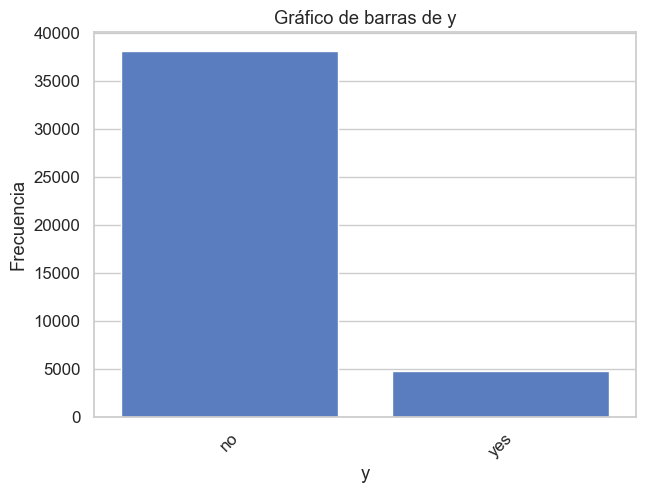

In [27]:
for col in cat_cols_bank:
    num_categories = bank[col].nunique()
    width = max(7, min(num_categories * 0.5, 25))
    height = 5 # Altura fija

    plt.figure(figsize=(width, height))
    sns.countplot(x=bank[col], order=bank[col].value_counts().index)

    plt.title(f'Gráfico de barras de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.xticks(rotation=45)

    plt.show()
    

**MATRIZ DE CORRELACIÓN**

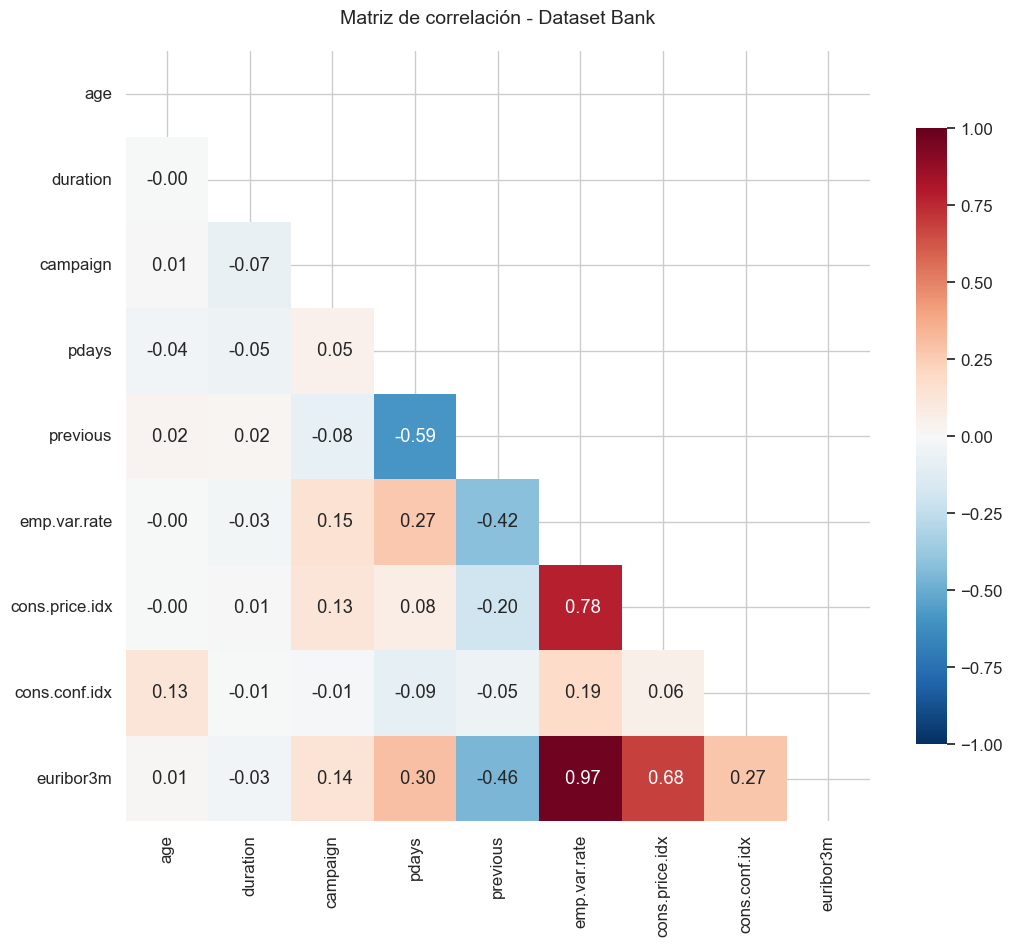

In [43]:
# Calcular la matriz de correlación
corr_matrix_bank = bank.corr(numeric_only=True)

# Crear la figura
plt. figure(figsize=(12, 10))

# Crear una máscara para mostrar solo la parte triangular
mask_bank = np.triu(np.ones_like(corr_matrix_bank, dtype=bool))

# Graficar el mapa de calor
sns.heatmap(corr_matrix_bank,
            annot=True,
            fmt=" .2f", 
            vmin=-1, vmax=1,
            mask=mask_bank,
            cbar_kws={"shrink": .8},
            cmap='RdBu_r')

plt.title("Matriz de correlación - Dataset Bank", fontsize=14, pad=20)
plt.show()


# ______________________________________________________________________-
# **RELACIONES CRUZADAS**

In [59]:
# Definimos la variable objetivo
target = 'y'

**CRUCES CATEGÓRICAS VS 'y'**

In [ ]:
# Definimos las variables categóricas
cat_cross_bank = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact','poutcome']

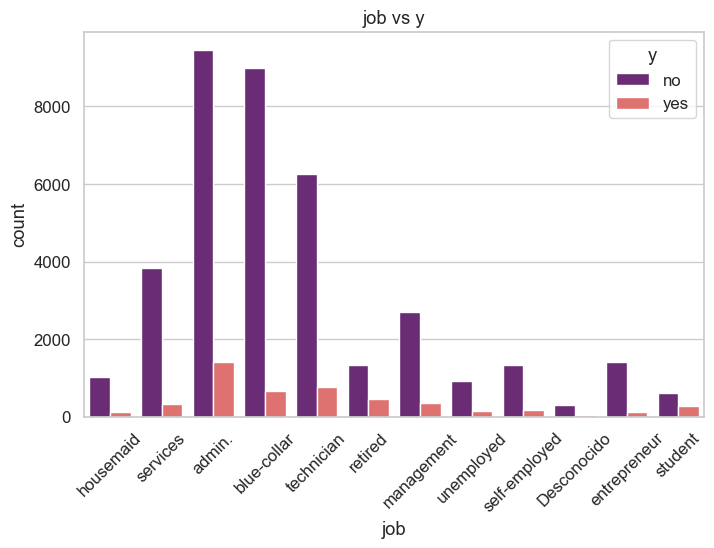

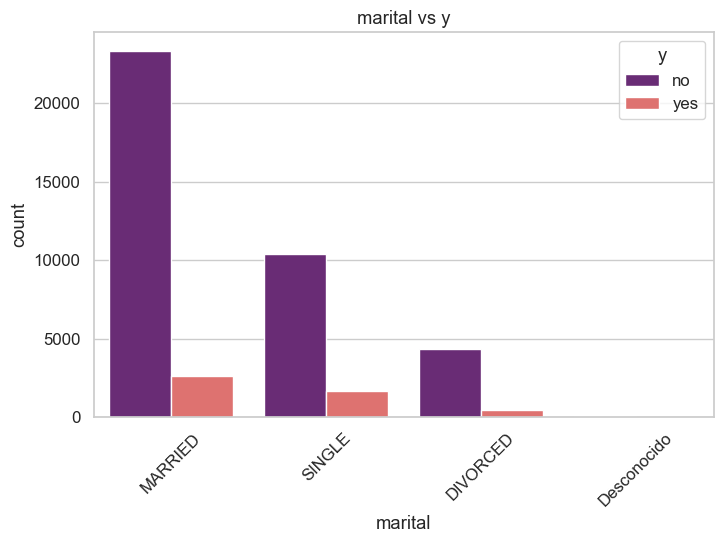

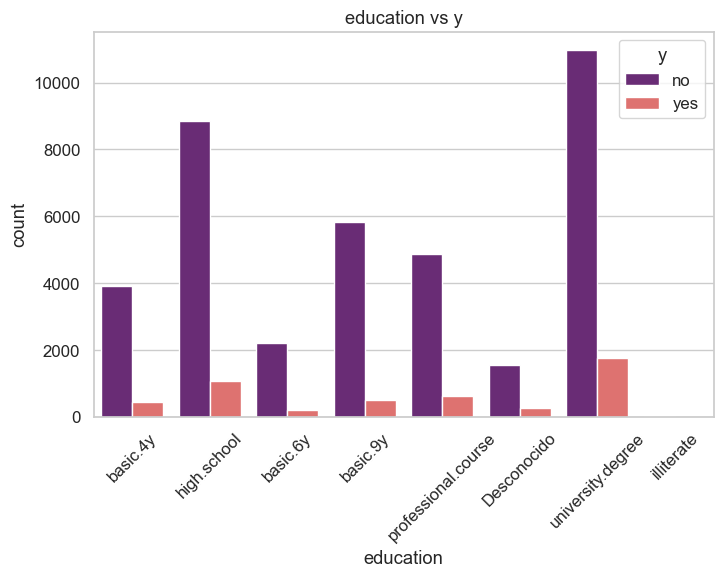

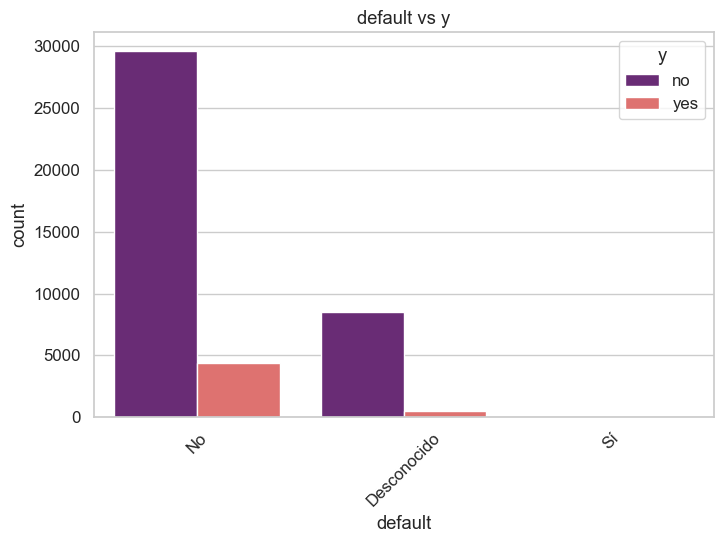

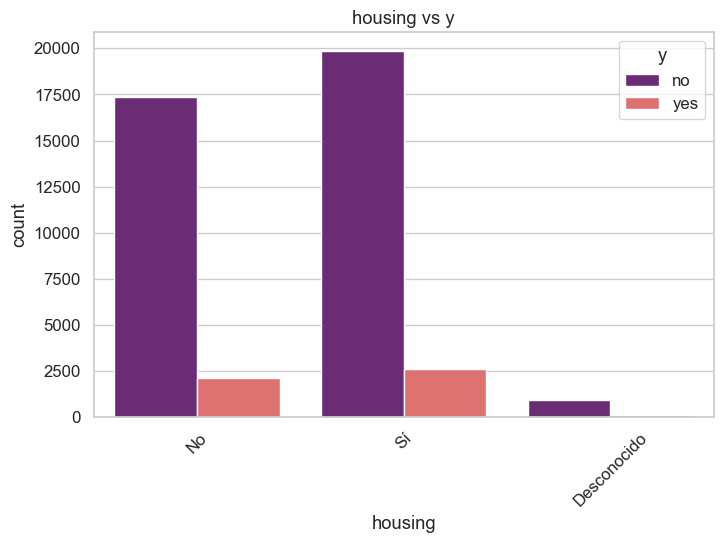

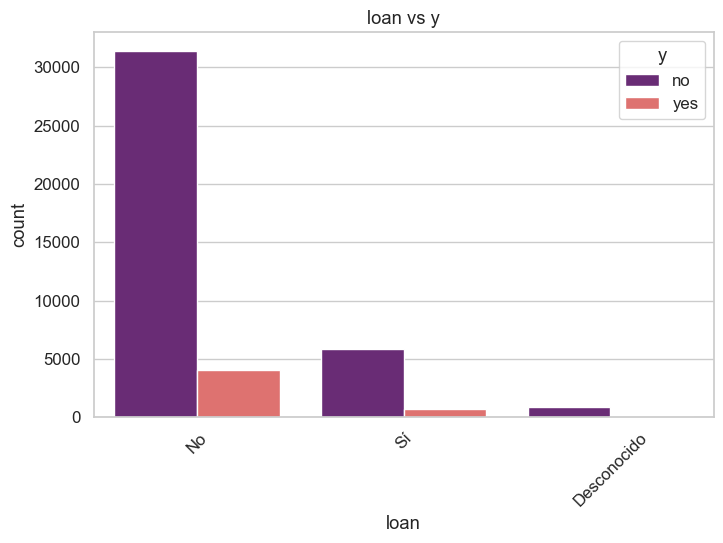

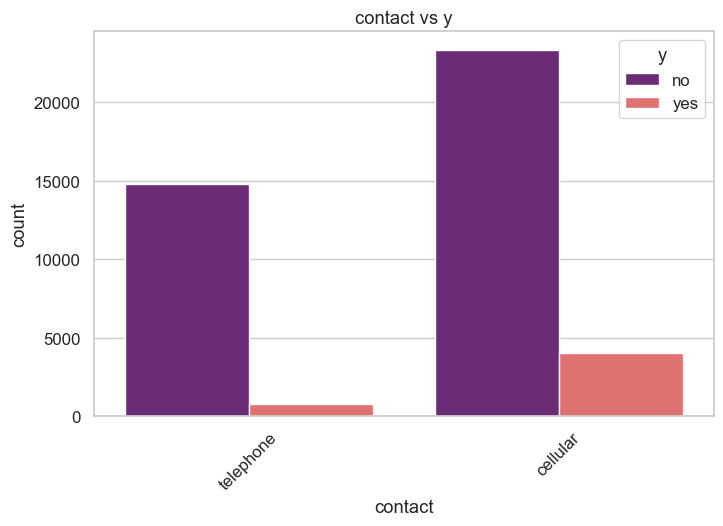

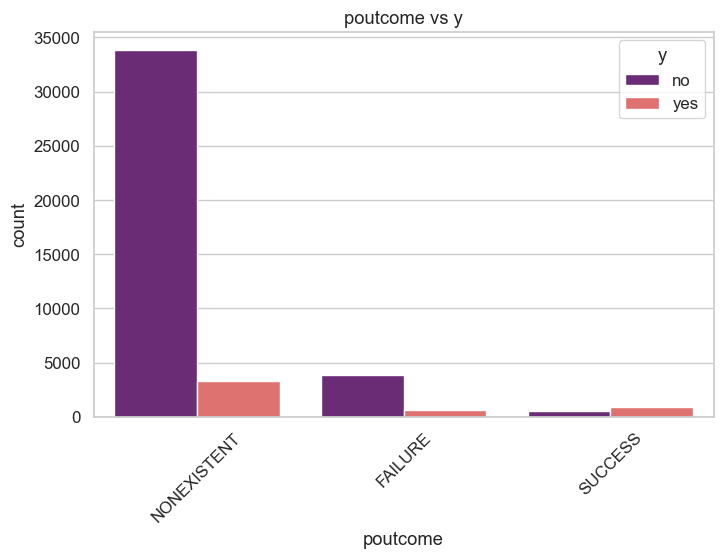

In [101]:
for col in cat_cross_bank:
    if col in bank.columns:
        plt.figure(figsize=(8, 5))
        sns.countplot(x=bank[col], hue=bank[target], data=bank, palette="magma")
        plt.title(f"{col} vs {target}")
        plt.xticks(rotation=45)
        plt.show()

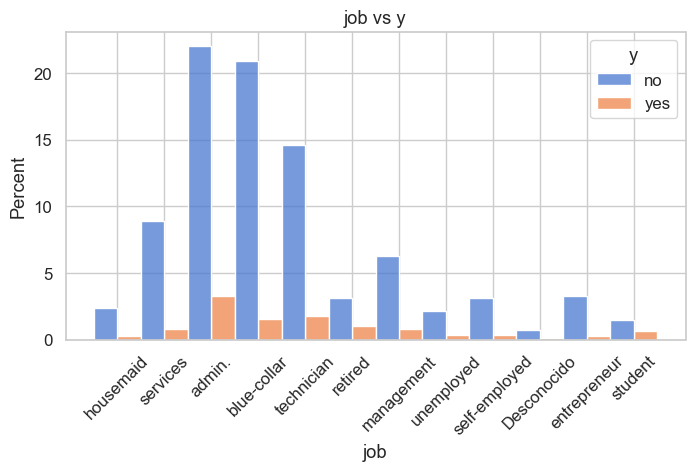

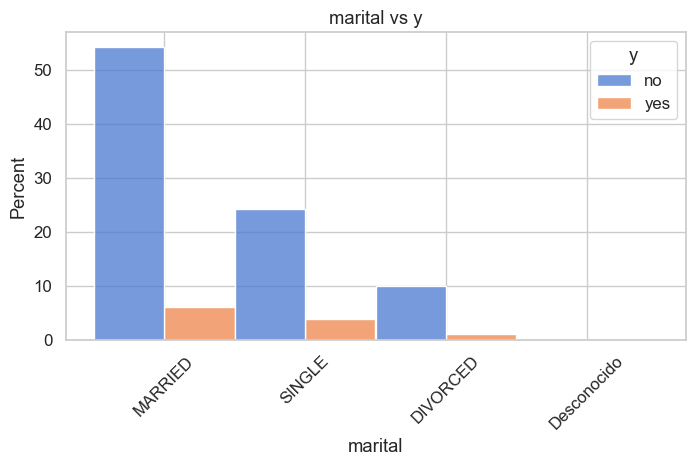

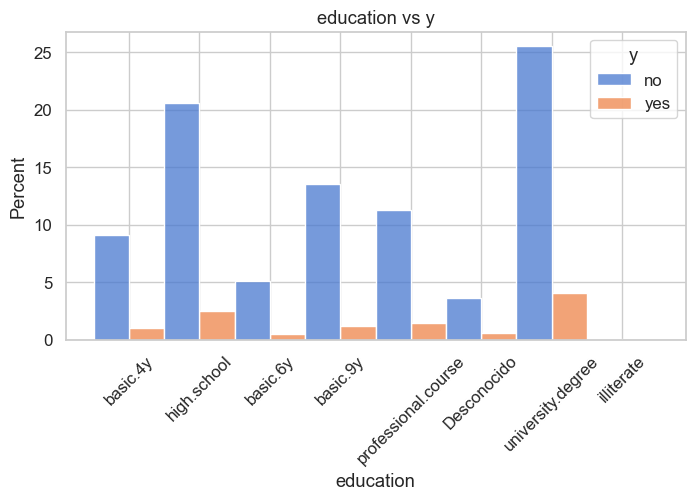

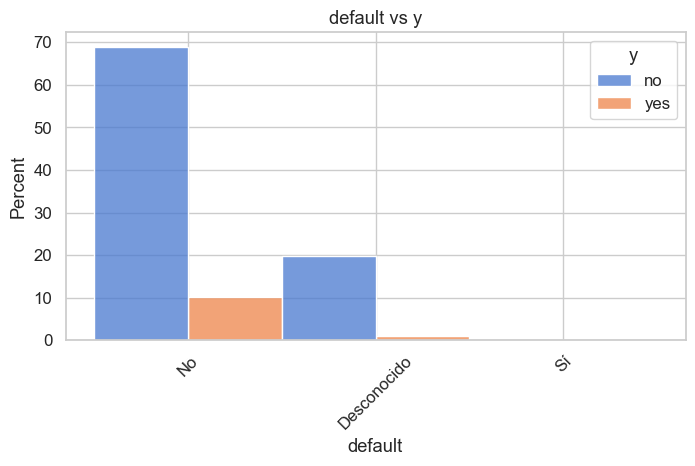

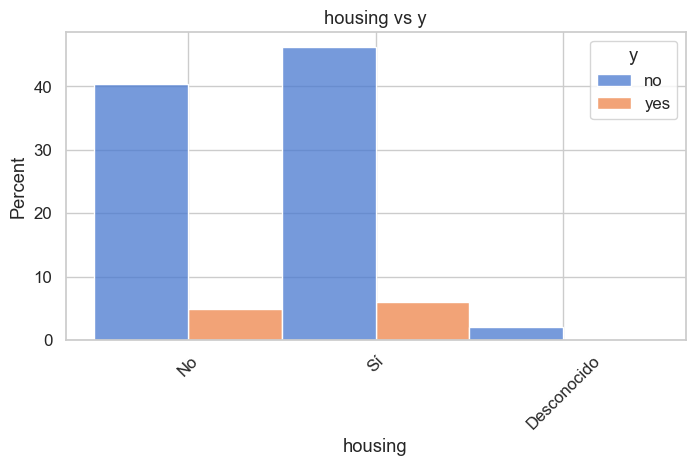

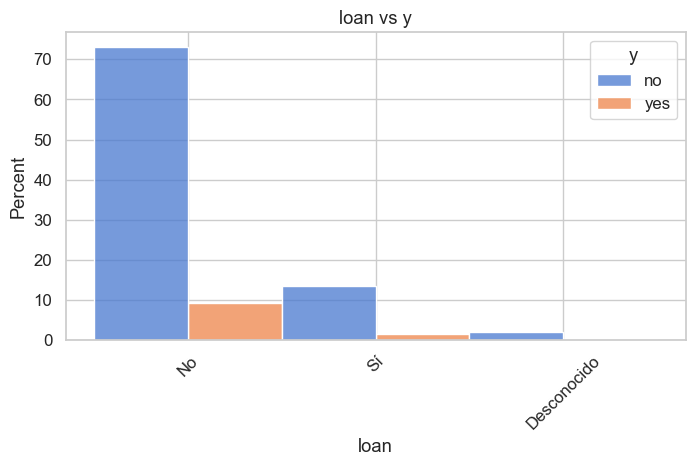

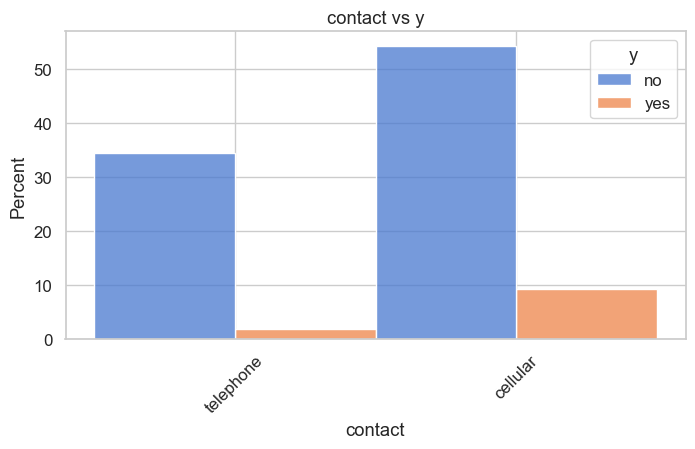

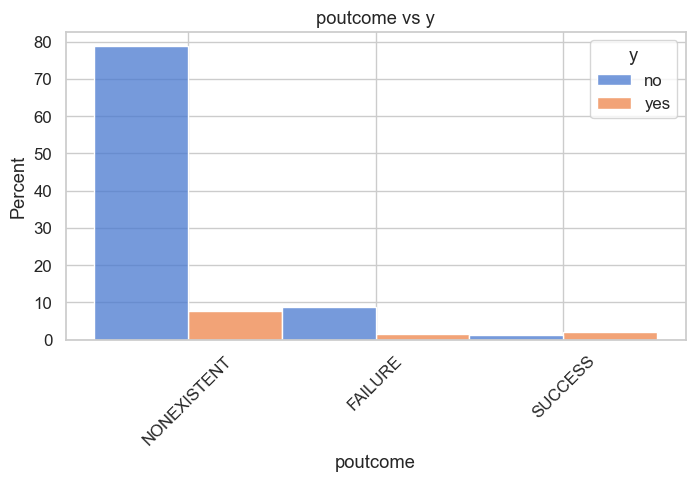

In [103]:
for col in cat_cross_bank:
    if col in bank.columns:
        plt.figure(figsize=(8, 4))
        sns.histplot(x=col, hue=target, data=bank, stat="percent", multiple="dodge")
        plt.title(f"{col} vs {target}")
        plt.xticks(rotation=45)
        plt.show()

**CRUCES NUMÉRICOS VS 'y'**

In [87]:
# Definimos variables numéricas para cruzar con 'y' 
num_cross_bank = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m']

In [88]:
# Revisar si hay columnas duplicadas
print(bank.columns[bank.columns.duplicated()])

# Revisar si hay índice duplicado
print(bank.index.duplicated().sum(), "índices duplicados")


Index([], dtype='object')
0 índices duplicados


In [89]:
bank = bank.reset_index(drop=True)

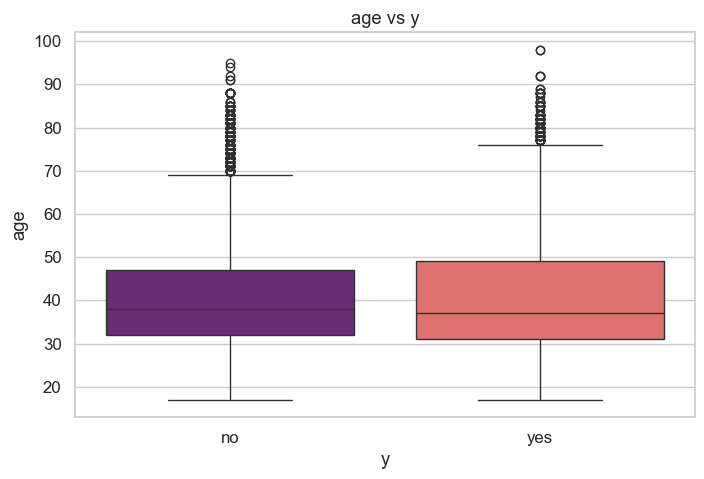

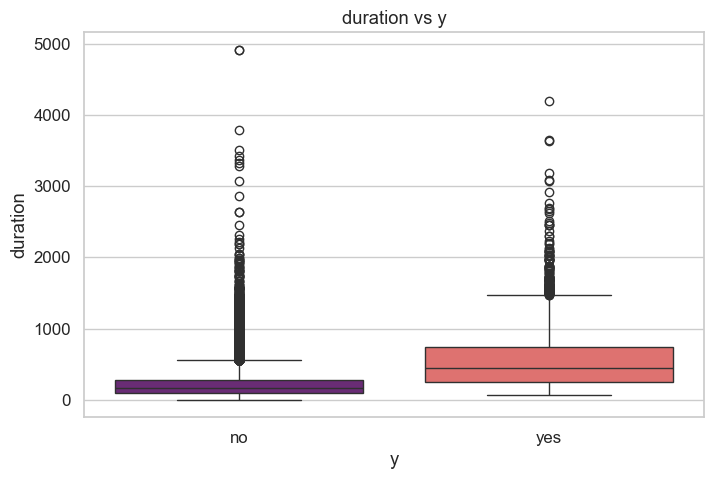

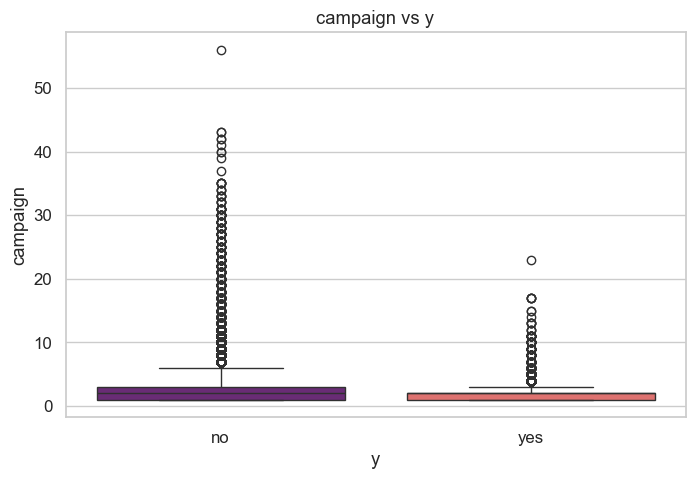

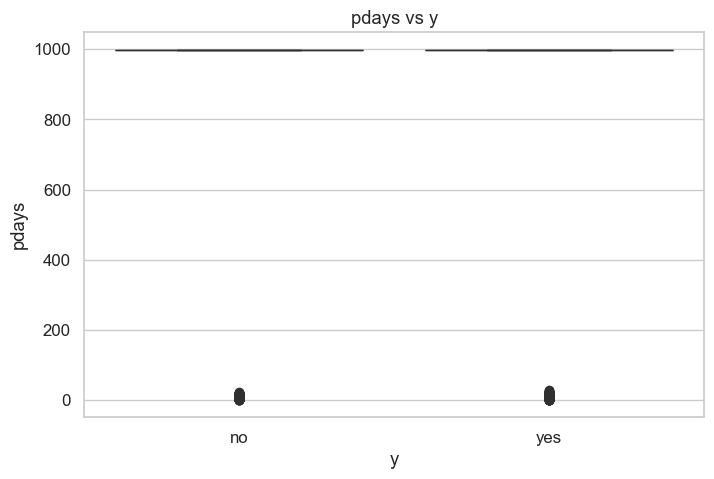

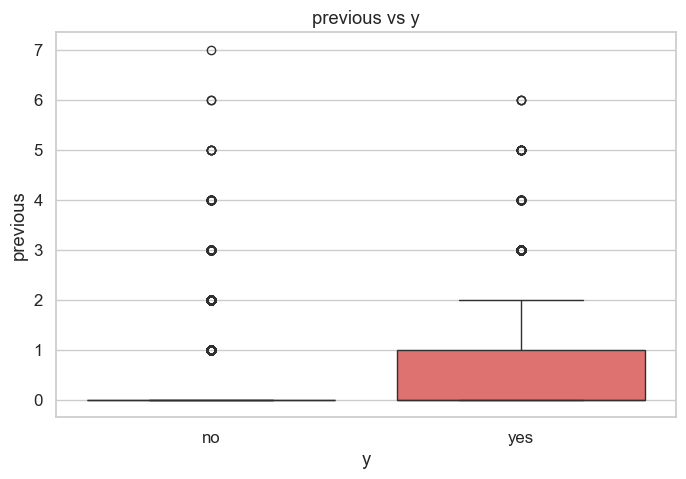

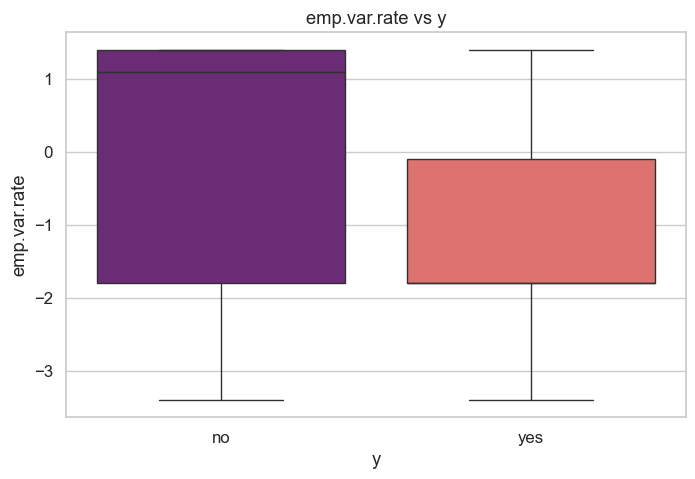

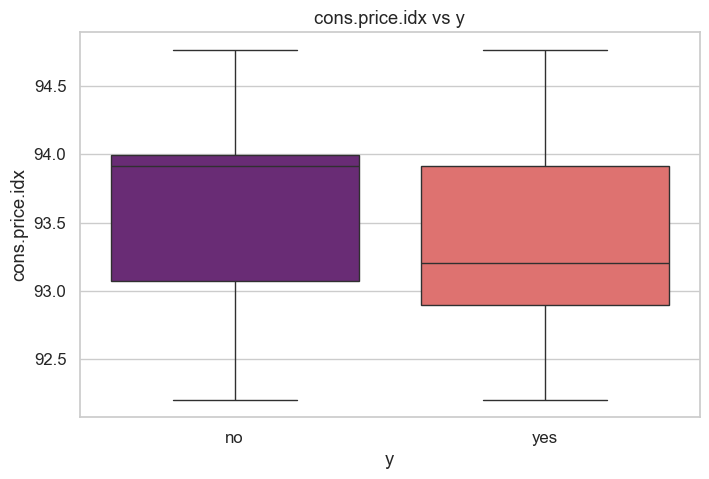

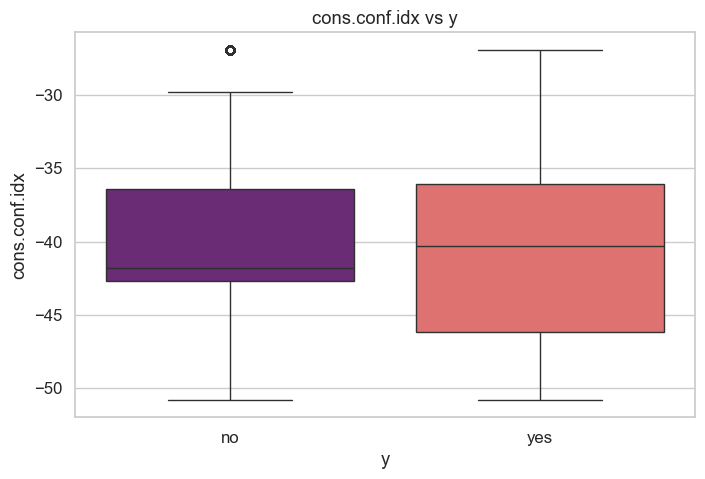

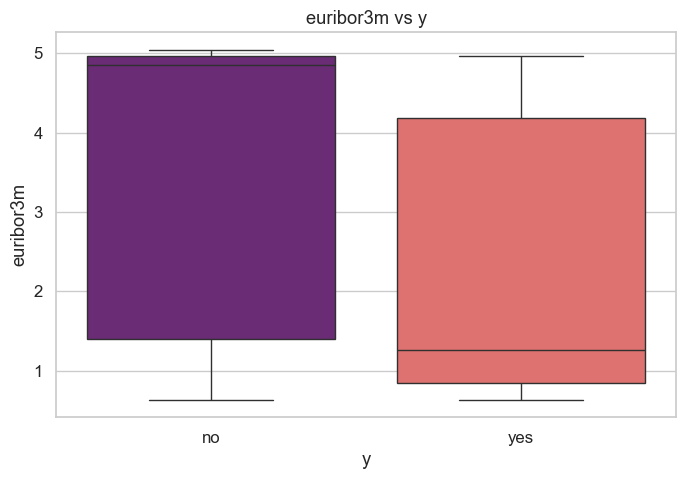

In [93]:
for col in num_cross_bank:
    if col in bank.columns:
        plt.figure(figsize=(8, 5))
        sns.boxplot(x=target, y=col, hue=target, data=bank, palette="magma", legend=False)
        plt.title(f"{col} vs {target}")
        plt.show()

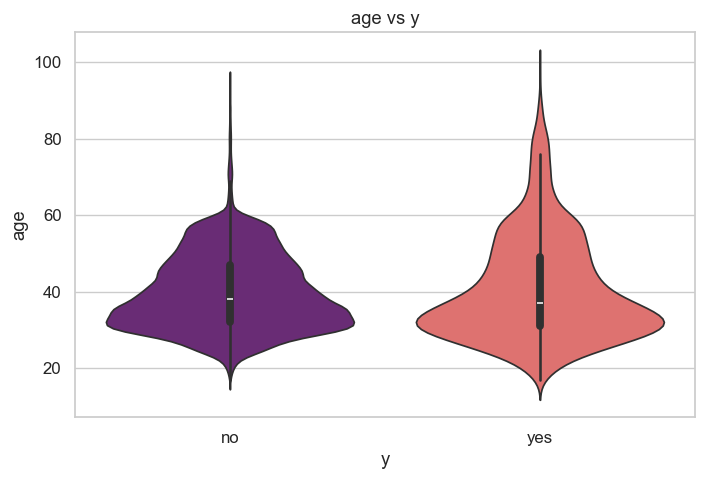

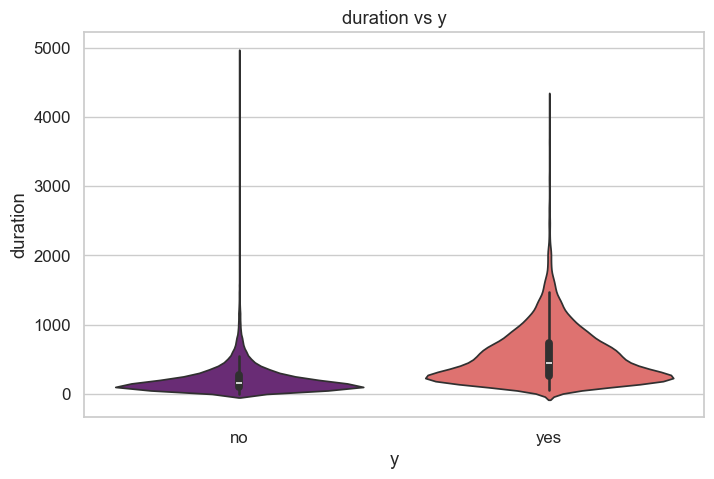

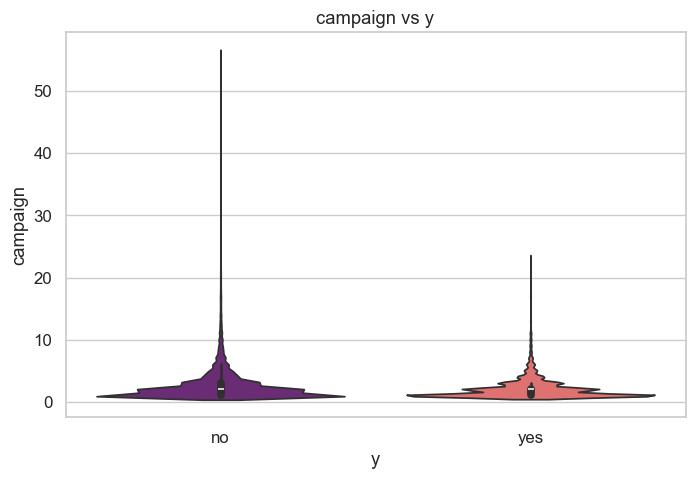

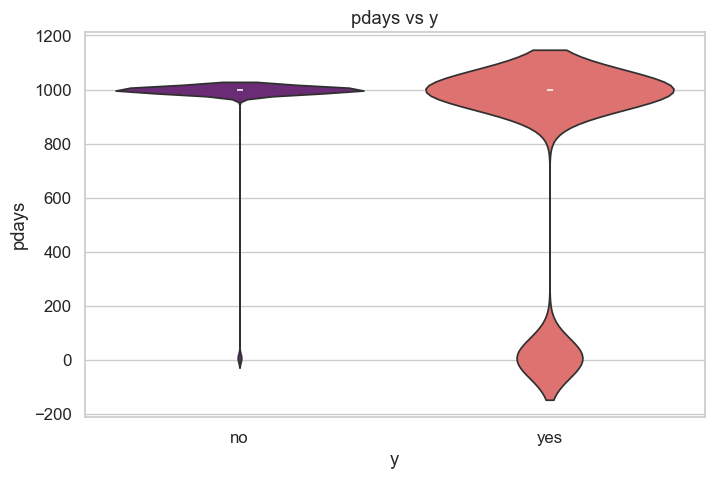

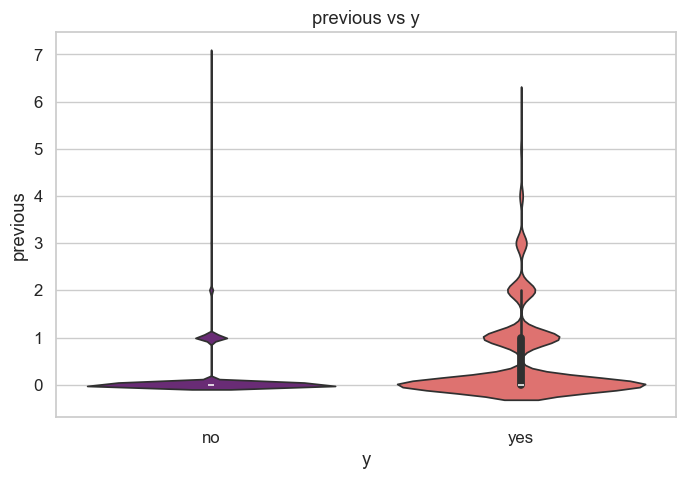

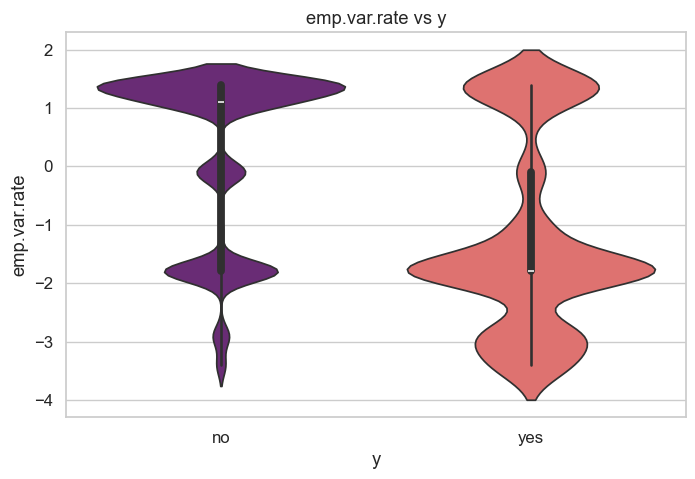

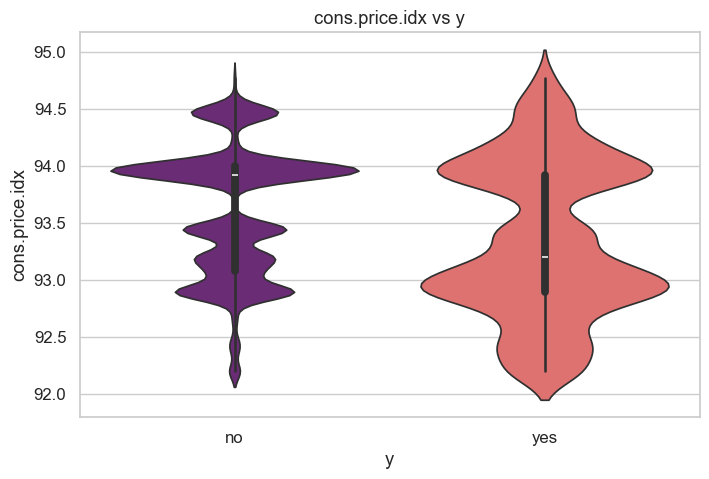

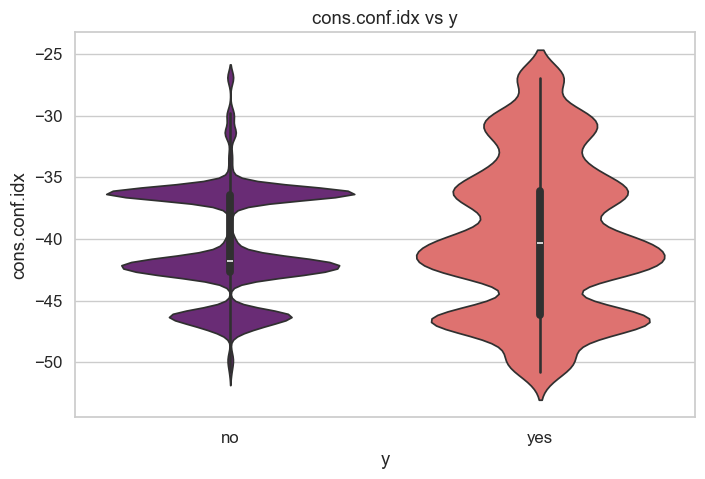

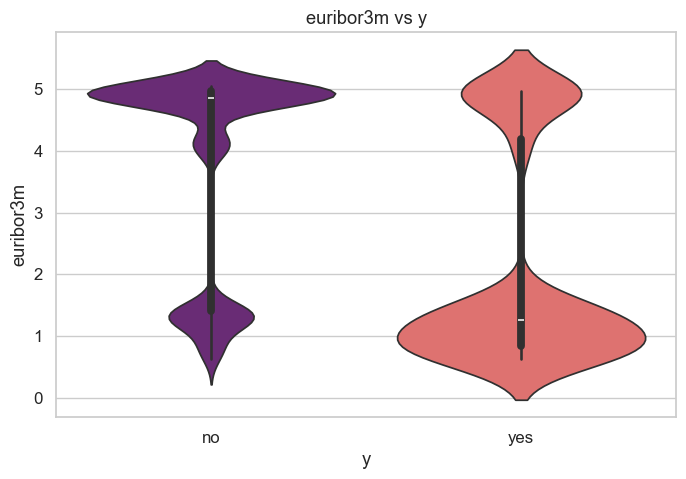

In [ ]:
# Para una distribución más detallada:
for col in num_cross_bank:
    if col in bank.columns:
        plt.figure(figsize=(8,5))
        sns.violinplot(x=target, y=col, hue=target, data=bank, palette="magma", legend=False)
        plt.title(f"{col} vs {target}")
        plt.show()


**TABLAS PROPORCIONALES (CATEGÓRICAS VS 'y')**

In [110]:
# --- Tabla resumen de proporciones 'yes' por categoría ---
summary_tables = {}

for col in cat_cross_bank:
    if col in bank.columns:
        table = (
            bank.groupby(col)[target]
            .value_counts(normalize=True)   # proporciones
            .rename("proportion")
            .mul(100)                       # en %
            .reset_index()
            .query(f"{target} == 'yes'")    # solo proporción de 'yes'
            .drop(columns=[target])
            .sort_values("proportion", ascending=False)
            .round(2)
        )
        summary_tables[col] = table

# Mostrar tablas de forma limpia
for col, table in summary_tables.items():
    print(f"\n--- Proporción de 'yes' en {col} ---")
    display(table)



--- Proporción de 'yes' en job ---


,job,proportion
19,student,31.34
13,retired,25.20
23,unemployed,14.39
3,admin.,13.01
1,Desconocido,11.30
11,management,11.21
21,technician,10.85
15,self-employed,10.81
9,housemaid,9.88
7,entrepreneur,8.28



--- Proporción de 'yes' en marital ---


,marital,proportion
3,Desconocido,15.29
7,SINGLE,13.93
5,MARRIED,10.21
1,DIVORCED,10.18



--- Proporción de 'yes' en education ---


,education,proportion
11,illiterate,22.22
1,Desconocido,14.44
15,university.degree,13.74
13,professional.course,11.32
9,high.school,10.84
3,basic.4y,10.28
5,basic.6y,8.13
7,basic.9y,7.81



--- Proporción de 'yes' en default ---


,default,proportion
3,No,12.86
1,Desconocido,5.21



--- Proporción de 'yes' en housing ---


,housing,proportion
5,Sí,11.63
1,Desconocido,11.11
3,No,10.85



--- Proporción de 'yes' en loan ---


,loan,proportion
3,No,11.33
1,Desconocido,11.11
5,Sí,10.92



--- Proporción de 'yes' en contact ---


,contact,proportion
1,cellular,14.74
3,telephone,5.16



--- Proporción de 'yes' en poutcome ---


,poutcome,proportion
4,SUCCESS,65.32
1,FAILURE,14.23
3,NONEXISTENT,8.82


**TABLAS PROPORCIONALES (NUMÉRICAS VS 'y')**

In [111]:
num_summary = bank.groupby(target)[num_cross_bank].mean().round(2)

print("Medias de variables numéricas por valor de 'y':")
display(num_summary)


Medias de variables numéricas por valor de 'y':


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m
y,,,,,,,,,
no,39.86,220.43,2.63,984.14,0.13,0.24,93.60,-40.60,3.81
yes,40.89,551.62,2.05,790.51,0.50,-1.24,93.35,-39.76,2.11


DIFERENCIA ABSOLUTA ENTRE GRUPOS

In [112]:
diff_summary = (num_summary.loc["yes"] - num_summary.loc["no"]).round(2)
print("Diferencia de medias (yes - no):")
display(diff_summary)

Diferencia de medias (yes - no):


age                 1.03
duration          331.19
campaign           -0.58
pdays            -193.63
previous            0.37
emp.var.rate       -1.48
cons.price.idx     -0.25
cons.conf.idx       0.84
euribor3m           -1.7
dtype: Float64

# _________________________________________________________________________________
# **ANÁLISIS DE INCONSISTENCIAS**

In [114]:
inconsistencies = []

# === REGLA 1: Edad ===
# No puede haber clientes con menos de 18 años o más de 100.
mask = (bank["age"] < 18) | (bank["age"] > 100)
for i in bank.index[mask]:
    inconsistencies.append((i, "Edad fuera de rango (<18 o >100)"))

# === REGLA 2: Duración de llamada ===
# La duración no puede ser negativa o igual a 0.
mask = bank["duration"] <= 0
for i in bank.index[mask]:
    inconsistencies.append((i, "Duración de llamada <= 0"))

# === REGLA 3: Número de contactos en la campaña ===
# campaign debe ser al menos 1 y nunca negativo.
mask = bank["campaign"] <= 0
for i in bank.index[mask]:
    inconsistencies.append((i, "Campaign <= 0"))

# === REGLA 4: Días desde el último contacto ===
# En este dataset 999 significa “nunca contactado antes”.
# Si aparece cualquier otro valor raro (ej. <0), lo marcamos como inconsistencia.
mask = (bank["pdays"] < 0) & (bank["pdays"] != 999)
for i in bank.index[mask]:
    inconsistencies.append((i, "pdays < 0 y != 999"))

# === REGLA 5: Contactos anteriores ===
# previous no puede ser negativo.
mask = bank["previous"] < 0
for i in bank.index[mask]:
    inconsistencies.append((i, "Previous < 0"))

# === REGLA 6: Consistencia entre previous y poutcome ===
# Si previous = 0, entonces poutcome debería ser 'nonexistent'.
mask = (bank["previous"] == 0) & (bank["poutcome"] != "nonexistent")
for i in bank.index[mask]:
    inconsistencies.append((i, "Previous=0 pero poutcome != nonexistent"))

# --- Crear DataFrame de inconsistencias ---
inconsistencies_df = pd.DataFrame(inconsistencies, columns=["Index", "Inconsistency"])

# --- Ver cuántas inconsistencias por regla ---
print(inconsistencies_df["Inconsistency"].value_counts())

# --- Filtrar filas inconsistentes ---
inconsistent_indices = inconsistencies_df["Index"].unique()
df_inconsistent_rows = bank.loc[inconsistent_indices]

df_inconsistent_rows.head()


Inconsistency
Previous=0 pero poutcome != nonexistent    37103
Edad fuera de rango (<18 o >100)               5
Duración de llamada <= 0                       4
Name: count, dtype: int64


,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,y,date
36973,17,student,SINGLE,Desconocido,No,Sí,No,cellular,432,3,4,2,SUCCESS,-2.9,92.201,-31.4,NaN,no,2015-12-04
37372,17,student,SINGLE,basic.9y,No,Sí,No,cellular,182,2,999,2,FAILURE,-2.9,92.201,-31.4,NaN,no,2018-08-26
37391,17,student,SINGLE,basic.9y,No,Sí,No,cellular,92,3,4,2,SUCCESS,-2.9,92.201,-31.4,NaN,no,2016-12-09
37412,17,student,SINGLE,basic.9y,No,Desconocido,Desconocido,cellular,498,2,999,1,FAILURE,-2.9,92.201,-31.4,0.869,yes,2018-12-08
38107,17,student,SINGLE,Desconocido,No,No,Sí,cellular,896,1,2,2,SUCCESS,-3.4,92.431,-26.9,0.742,yes,2015-02-24


**CORRECCIÓN Y LIMPIEZA DE INCONSISTENCIAS**

In [115]:
# 1. Corregimos si previous = 0, entonces poutcome = 'nonexistent' 
bank.loc[bank['previous'] == 0, "poutcome"] = "nonexistent"

In [116]:
# 2. Eliminar edades imposibles (<18 o >100)
bank = bank[(bank['age'] >= 18) & (bank["age"] <= 100)]

In [117]:
# 3. Eliminar llamadas con duración <= 0
bank = bank[bank['duration'] > 0]

In [118]:
print("Filas finales en bank:", bank.shape[0])

Filas finales en bank: 37871


In [122]:
# Comprobamos que ya no hay inconsistencias

# Edad fuera de rango
print("Edades fuera de rango:", bank[(bank["age"] < 18) | (bank["age"] > 100)].shape[0])

# Duración <= 0
print("Duración <= 0:", bank[bank["duration"] <= 0].shape[0])

# Previous=0 pero poutcome != nonexistent
check_incons = bank[(bank["previous"] == 0) & (bank["poutcome"] != "nonexistent")]
print("Previous=0 y poutcome != nonexistent:", check_incons.shape[0])

Edades fuera de rango: 0
Duración <= 0: 0
Previous=0 y poutcome != nonexistent: 0


**GUARDAMOS EL DATAFRAME NUEVO**

In [124]:
bank.to_csv('bank-additional_EDA.csv')

# ____________________________________________________________________________________________________________________________________________

## 🔹 EDA DE 'customers'

**CARGA DE DATOS**

In [144]:
# Dataset complementario (información clientes)
# -------------------------------------------------------------------------------------------------------
customers_2012 = pd.read_excel("customer-details.xlsx", sheet_name=0, index_col=0)
customers_2013 = pd.read_excel("customer-details.xlsx", sheet_name=1, index_col=0)
customers_2014 = pd.read_excel("customer-details.xlsx", sheet_name=2, index_col=0)

customers = pd.concat([customers_2012, customers_2013, customers_2014], ignore_index=True)

customers.head()

,Income,Kidhome,Teenhome,Dt_Customer,NumWebVisitsMonth,ID
0,161770,1,0,2012-04-04,29,089b39d8-e4d0-461b-87d4-814d71e0e079
1,85477,1,1,2012-12-30,7,e9d37224-cb6f-4942-98d7-46672963d097
2,147233,1,1,2012-02-02,5,3f9f49b5-e410-4948-bf6e-f9244f04918b
3,121393,1,2,2012-12-21,29,9991fafb-4447-451a-8be2-b0df6098d13e
4,63164,1,2,2012-06-20,20,eca60b76-70b6-4077-80ba-bc52e8ebb0eb


In [145]:
print(f"El número de filas para customers es {customers.shape[0]}, y el número de columnas es {customers.shape[1]}")

El número de filas para customers es 43170, y el número de columnas es 6


In [146]:
# Información general del dataset 'bank'
# -------------------------------------------------------------------------------------------------------
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43170 entries, 0 to 43169
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Income             43170 non-null  int64         
 1   Kidhome            43170 non-null  int64         
 2   Teenhome           43170 non-null  int64         
 3   Dt_Customer        43170 non-null  datetime64[ns]
 4   NumWebVisitsMonth  43170 non-null  int64         
 5   ID                 43170 non-null  object        
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 2.0+ MB


In [147]:
customers.columns

Index(['Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'NumWebVisitsMonth',
       'ID'],
      dtype='object')

**REVISIÓN INICIAL**

In [130]:
# Revisar si hay duplicados
# -------------------------------------------------------------------------------------------------------
print("Duplicados:", customers.duplicated().sum())

Duplicados: 0


In [131]:
# Comprobar si hay Nulos
# -------------------------------------------------------------------------------------------------------
print("Nulos por columna:")
print(customers.isnull().sum())

Nulos por columna:
Income               0
Kidhome              0
Teenhome             0
Dt_Customer          0
NumWebVisitsMonth    0
ID                   0
dtype: int64


**DESCRIPCIÓN DE LAS COLUMNAS**

- **Income:** Representa el ingreso anual del cliente en términos monetarios.
- **Kidhome:** Indica el número de niños en el hogar del cliente.
- **Teenhome:** Indica el número de adolescentes en el hogar del cliente.
- **Dt_Customer:** Representa la fecha en que el cliente se convirtió en cliente de la empresa
- **NumWebVisitsMonth:** Indica la cantidad de visitas mensuales del cliente al sitio web de la empresa.
- **ID:** Identificador único del cliente.

**LIMPIEZA Y TRANSFORMACIÓN**

In [136]:
# Conversión de fecha
# -------------------------------------------------------------------------------------------------------
customers['Dt_Customer'] =pd.to_datetime(customers['Dt_Customer'], errors='coerce')

customers["Dt_Customer"].head()

0   2012-04-04
1   2012-12-30
2   2012-02-02
3   2012-12-21
4   2012-06-20
Name: Dt_Customer, dtype: datetime64[ns]

In [133]:
# Crear columna con "antigüedad de cliente" en años
# -------------------------------------------------------------------------------------------------------
today = pd.Timestamp.today()
customers['Customer_Years'] = ((today - customers['Dt_Customer']).dt.days / 365).round(1)

# **ANÁLISIS DESCRIPTIVO**

**VARIABLES NUMÉRICAS**

In [148]:
num_cols_customers = ['Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'NumWebVisitsMonth']

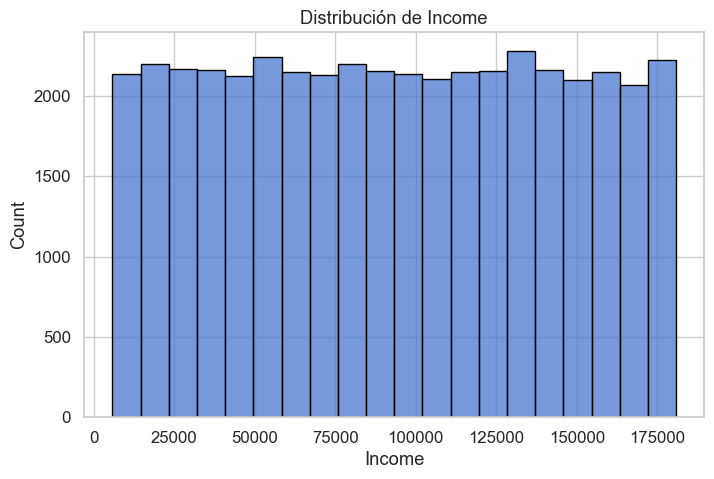

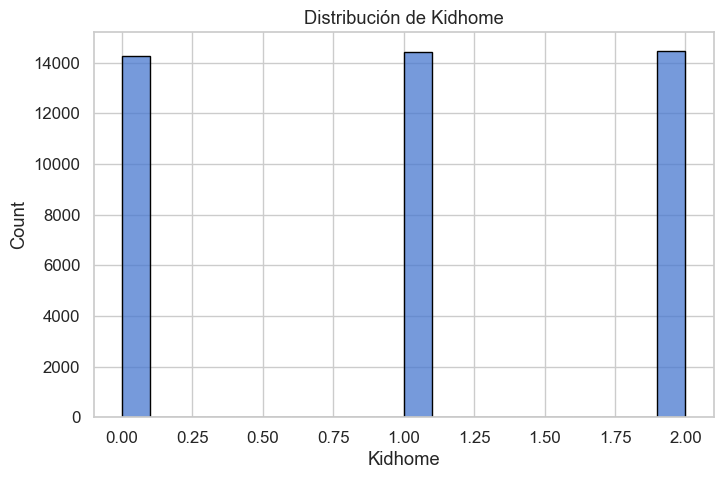

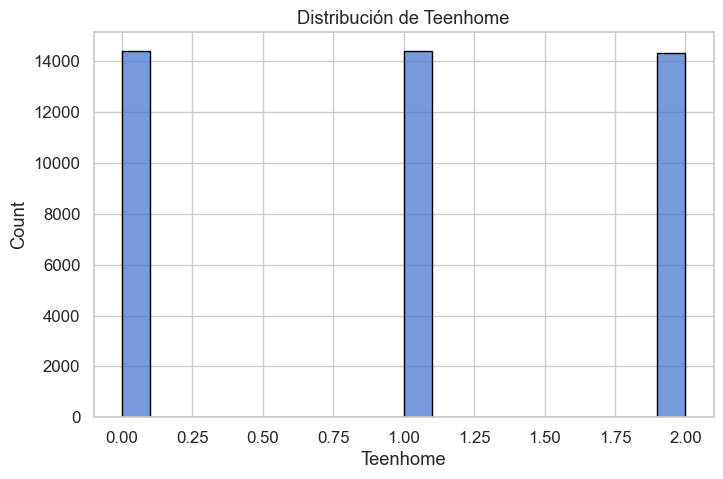

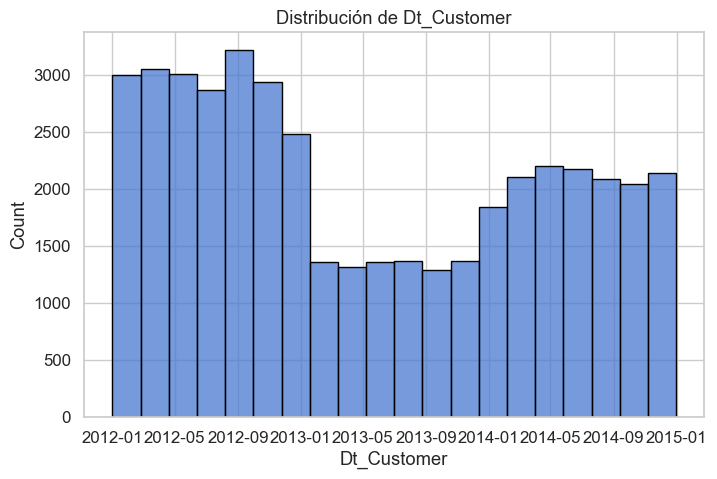

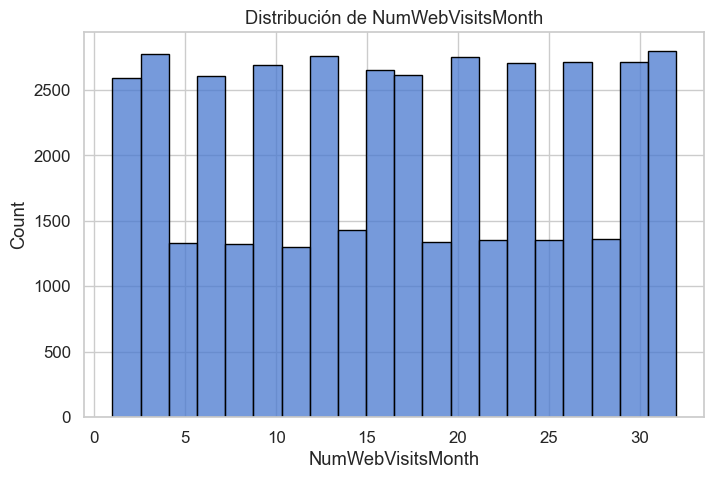


Resumen de NumWebVisitsMonth:
count    43170.00
mean        16.59
std          9.24
min          1.00
25%          9.00
50%         17.00
75%         25.00
max         32.00
Name: NumWebVisitsMonth, dtype: float64


In [ ]:
# HISTOGRAMA
for col in num_cols_customers:
    plt.figure(figsize=(8,5))
    sns.histplot(customers[col], bins=20, edgecolor="black")
    plt.title(f"Distribución de {col}")
    plt.show()

print(f"\nResumen de {col}:")
print(customers[col].describe().round(2))

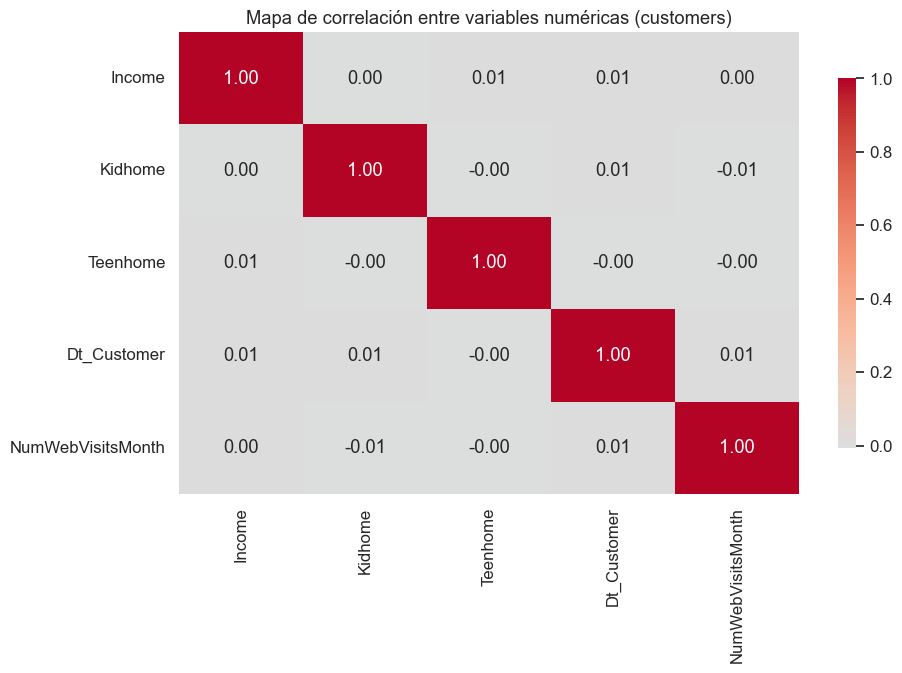

In [176]:
plt.figure(figsize=(10,6))
corr = customers[num_cols_customers].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cbar_kws={"shrink": .8}, cmap='coolwarm', center=0, cbar=True)
plt.title("Mapa de correlación entre variables numéricas (customers)")
plt.show()

# _____________________________________________________________________________________

# **RELACIONES CRUZADAS**

**INGRESOS VS HIJOS EN CASA**

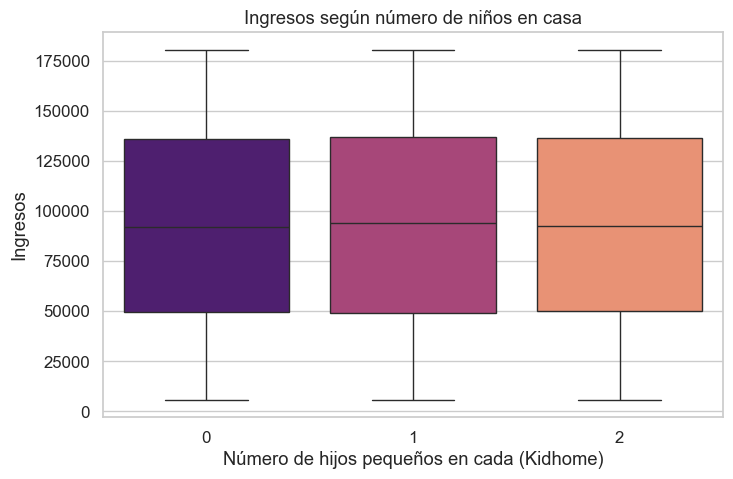

In [168]:
# Ingresos según nº de hijos pequeños
plt.figure(figsize=(8,5))
sns.boxplot(x="Kidhome", y="Income", data=customers, hue="Kidhome", palette=sns.color_palette("magma", n_colors=customers['Kidhome'].nunique()), legend=False)
plt.title("Ingresos según número de niños en casa")
plt.xlabel("Número de hijos pequeños en cada (Kidhome)")
plt.ylabel("Ingresos")
plt.show()

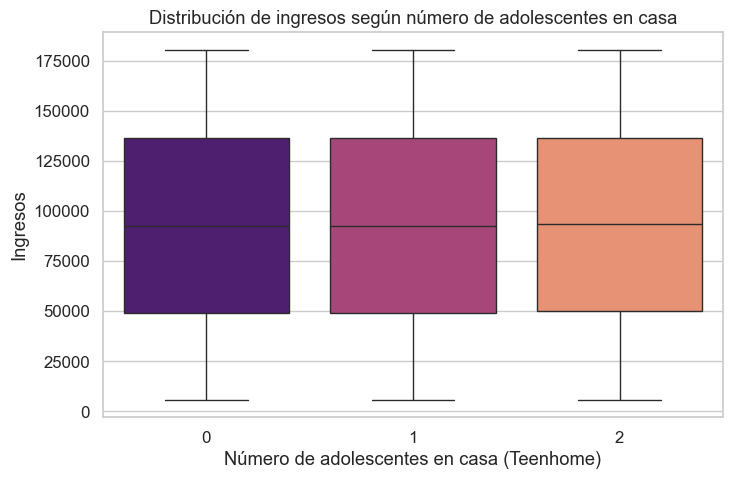

In [169]:
# Ingresos según nº de adolescemtes
plt.figure(figsize=(8,5))
sns.boxplot(x="Teenhome", y="Income", data=customers, hue="Teenhome", palette=sns.color_palette("magma", n_colors=customers['Teenhome'].nunique()), legend=False)
plt.title("Distribución de ingresos según número de adolescentes en casa")
plt.xlabel("Número de adolescentes en casa (Teenhome)")
plt.ylabel("Ingresos")
plt.show()

**VISITAS WEB VS ESTRUCTURA FAMILIAR**

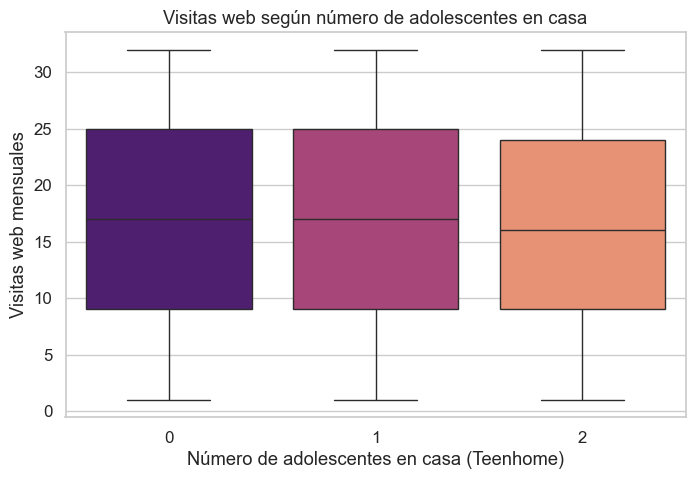

In [170]:
# Visitas web según nº de adolescentes en el hogar
plt.figure(figsize=(8,5))
sns.boxplot(x="Teenhome", y="NumWebVisitsMonth", data=customers, hue="Teenhome", palette=sns.color_palette("magma", n_colors=customers['Teenhome'].nunique()), legend=False)
plt.title("Visitas web según número de adolescentes en casa")
plt.xlabel("Número de adolescentes en casa (Teenhome)")
plt.ylabel("Visitas web mensuales")
plt.show()

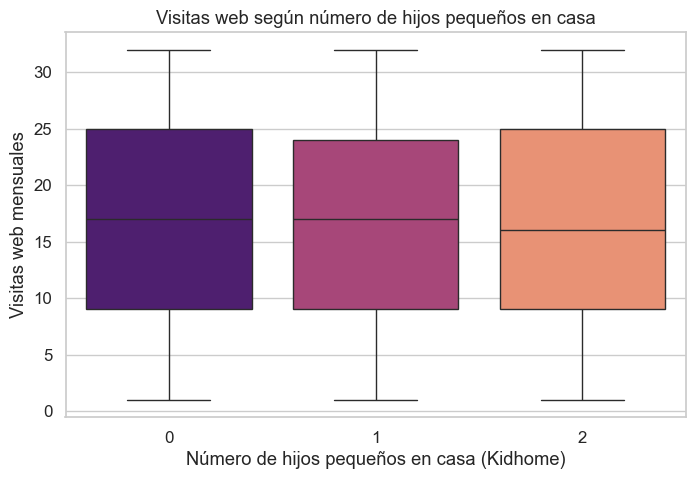

In [171]:
# Visitas web según nº niños en el hogar
plt.figure(figsize=(8,5))
sns.boxplot(x="Kidhome", y="NumWebVisitsMonth", data=customers, hue="Kidhome", palette=sns.color_palette("magma", n_colors=customers['Kidhome'].nunique()), legend=False)
plt.title("Visitas web según número de hijos pequeños en casa")
plt.xlabel("Número de hijos pequeños en casa (Kidhome)")
plt.ylabel("Visitas web mensuales")
plt.show()

**INGRESOS VS VISITAS WEB**

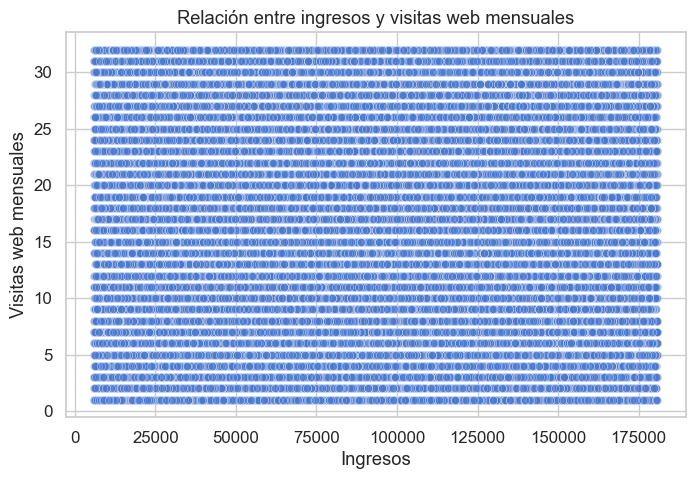

In [172]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="Income", y="NumWebVisitsMonth", data=customers, alpha=0.5)
plt.title("Relación entre ingresos y visitas web mensuales")
plt.xlabel("Ingresos")
plt.ylabel("Visitas web mensuales")
plt.show()

# ___________________________________________________________________________________

# **INCONSISTENCIAS**

In [173]:
inconsistencias = []

# Regla 1. Income negativo o 0
mask = customers['Income'] <= 0
for i in customers.index[mask]:
    inconsistencias.append((i, "Ingreso <= 0"))

# Regla 2. Nº de hijos/adolescentes negativos
mask = (customers['Kidhome'] < 0) | (customers['Teenhome'] < 0)
for i in customers.index[mask]:
    inconsistencias.append((i, "Kidhome/Teenhome < 0"))

# Regla 3. Visitas web negativas
mask = customers['NumWebVisitsMonth'] < 0
for i in customers.index[mask]:
    inconsistencias.append((i, "NumWebVisitsMonth < 0"))

# Regla 4. Fechas nulas
mask = customers['Dt_Customer'].isnull()
for i in customers.index[mask]:
    inconsistencies.append((i, "Fecha de cliente inválida"))

# Crear DataFrame de inconsistencias
inconsistencias_df = pd.DataFrame(inconsistencias, columns=["Index", "Inconsistency"])
print(inconsistencias_df["Inconsistency"].value_counts())

Series([], Name: count, dtype: int64)


# ______________________________________________________________________________________

# 📌 CONCLUSIONES DEL EDA de 'customers'

- El dataset **no contiene duplicados ni valores nulos**, por lo que no ha sido necesario una limpieza adicional.
- Las variables disponibles ('Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'NumWebVisitsMonth', 'ID') son de carácter **descriptivo y demográfico**.
- En los análisis cruzados realizados (**Ingresos vs hijos**, **Ingresos vs visitas web**, etc.), **no se observan patrones claros o relaciones significativas**.
- Esto indica que, por sí solo, el dataset 'customers' **no aporta información concluyente para explicar comportamientos o resultados**.

**Sin embargo, el verdadero valore de 'customers' se encuentra en su integración con 'bank' a través de la columna 'ID'**.

Gracias a esta unión podremos enriquecer la información bancaria con variables adicionales (como ingresos, visitas web, números de hijos o antigüedad como cliente), lo que permitirá análisis más completos y posiblemente más interpretables.

# _____________________________________________________________________________________

## 🔹 EDA COMBINADO - 'bank' + 'customers'

**CARGAR DATASETS LIMPIOS**

In [225]:
# Dataset bancario limpio (guardado previamente con todos los datos encontrados anteriormente pero manteniendo 'id_')
bank_clean = pd.read_csv("bank_clean.csv")

# Como customer de por si ya está limpio, no hace falta volver a cargar los datos

In [226]:
# Revisamos la estructura básica

print("Bank:")
print(bank_clean.info)

Bank:
<bound method DataFrame.info of        Unnamed: 0  age          job  marital            education  \
0               1   57     services  MARRIED          high.school   
1               2   37     services  MARRIED          high.school   
2               3   40       admin.  MARRIED             basic.6y   
3               4   56     services  MARRIED          high.school   
4               5   45     services  MARRIED             basic.9y   
...           ...  ...          ...      ...                  ...   
37866       28721   36  blue-collar  MARRIED          Desconocido   
37867       37852   26      student   SINGLE          high.school   
37868        1120   34  blue-collar   SINGLE             basic.9y   
37869        3797   30       admin.  MARRIED    university.degree   
37870       26206   34   technician  MARRIED  professional.course   

           default housing loan    contact  duration  campaign  pdays  \
0      Desconocido      No   No  telephone       149        

In [227]:
print("\nCustomers:")
print(customers.info)


Customers:
<bound method DataFrame.info of        Income  Kidhome  Teenhome Dt_Customer  NumWebVisitsMonth  \
0      161770        1         0  2012-04-04                 29   
1       85477        1         1  2012-12-30                  7   
2      147233        1         1  2012-02-02                  5   
3      121393        1         2  2012-12-21                 29   
4       63164        1         2  2012-06-20                 20   
...       ...      ...       ...         ...                ...   
43165  156980        1         2  2014-05-17                  7   
43166  139820        0         0  2014-09-29                  1   
43167   78470        2         2  2014-10-28                 12   
43168  144218        0         1  2014-07-01                  9   
43169  115155        0         2  2014-12-25                  7   

                                         ID  
0      089b39d8-e4d0-461b-87d4-814d71e0e079  
1      e9d37224-cb6f-4942-98d7-46672963d097  
2      3f9f49

**MERGE DE LOS DATASETS**

In [228]:
# Unir datasets por la columna ID/id_
merged = pd.merge(bank_clean, customers,
                  left_on="id_",
                  right_on="ID",
                  how="inner") # con esto nos quedamos solo con los IDs comunes

In [229]:
# Revisar resultado
print("Dimensiones originales:")
print("Bank:", bank_clean.shape, " | Customers:", customers.shape)
print("Dimensión tras merge:", merged.shape)

Dimensiones originales:
Bank: (37871, 21)  | Customers: (43170, 6)
Dimensión tras merge: (37871, 27)


In [230]:
print("\n=== Info general del dataset combinado ===")
print(merged.info())


=== Info general del dataset combinado ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37871 entries, 0 to 37870
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Unnamed: 0         37871 non-null  int64         
 1   age                37871 non-null  int64         
 2   job                37871 non-null  object        
 3   marital            37871 non-null  object        
 4   education          37871 non-null  object        
 5   default            37871 non-null  object        
 6   housing            37871 non-null  object        
 7   loan               37871 non-null  object        
 8   contact            37871 non-null  object        
 9   duration           37871 non-null  int64         
 10  campaign           37871 non-null  int64         
 11  pdays              37871 non-null  int64         
 12  previous           37871 non-null  int64         
 13  poutcome         

**LIMPIEZA POST-MERGE**

In [231]:
# Eliminar columnas redundantes si existen (como pueden ser ID duplicados)
if "ID" in merged.columns:
    merged.drop(columns=["ID"], inplace=True)

In [232]:
# Revisar duplicados y nulos tras el merge
print("Duplicados:", merged.duplicated().sum())
print("Nulos por columna:")
print(merged.isnull().sum())

Duplicados: 0
Nulos por columna:
Unnamed: 0              0
age                     0
job                     0
marital                 0
education               0
default                 0
housing                 0
loan                    0
contact                 0
duration                0
campaign                0
pdays                   0
previous                0
poutcome                0
emp.var.rate            0
cons.price.idx        412
cons.conf.idx           0
euribor3m            8082
y                       0
date                  215
id_                     0
Income                  0
Kidhome                 0
Teenhome                0
Dt_Customer             0
NumWebVisitsMonth       0
dtype: int64


**ANÁLISIS DESCRIPTIVO COMBINADO**

In [233]:
# Variables numéricos
num_cols = merged.select_dtypes(include=["int64", "float64"]).columns
print("\nResumen variables numéricas:")
print(merged[num_cols].describe())


Resumen variables numéricas:
         Unnamed: 0           age      duration      campaign         pdays  \
count  37871.000000  37871.000000  37871.000000  37871.000000  37871.000000   
mean   20636.096195     39.979562    258.101925      2.574212    962.478651   
std    11873.117591     10.435083    259.588759      2.786635    186.894268   
min        1.000000     18.000000      1.000000      1.000000      0.000000   
25%    10363.000000     32.000000    102.000000      1.000000    999.000000   
50%    20601.000000     38.000000    179.000000      2.000000    999.000000   
75%    30924.500000     47.000000    320.000000      3.000000    999.000000   
max    41186.000000     98.000000   4918.000000     56.000000    999.000000   

           previous  emp.var.rate  cons.price.idx  cons.conf.idx  \
count  37871.000000  37871.000000    37459.000000   37871.000000   
mean       0.173061      0.079140       93.575476     -40.509313   
std        0.494484      1.573112        0.578978     

In [234]:
# Variables categóricas
cat_cols = merged.select_dtypes(include=["object"]).columns
print("\nResumen variables categóricas:")
for col in cat_cols:
    print(f"\n--- {col} ---")
    print(merged[col].value_counts(normalize=True).round(2))


Resumen variables categóricas:

--- job ---
job
admin.           0.25
blue-collar      0.22
technician       0.16
services         0.10
management       0.07
retired          0.04
entrepreneur     0.04
self-employed    0.03
housemaid        0.03
unemployed       0.02
student          0.02
Desconocido      0.01
Name: proportion, dtype: float64

--- marital ---
marital
MARRIED        0.60
SINGLE         0.28
DIVORCED       0.11
Desconocido    0.00
Name: proportion, dtype: float64

--- education ---
education
university.degree      0.30
high.school            0.23
basic.9y               0.15
professional.course    0.13
basic.4y               0.10
basic.6y               0.06
Desconocido            0.04
illiterate             0.00
Name: proportion, dtype: float64

--- default ---
default
No             0.79
Desconocido    0.21
Sí             0.00
Name: proportion, dtype: float64

--- housing ---
housing
Sí             0.52
No             0.45
Desconocido    0.02
Name: proportion, dtype: fl

**COMPARATIVAS NUEVAS GRACIAS AL MERGE**

INGRESOS vs RESPUESTA (y)

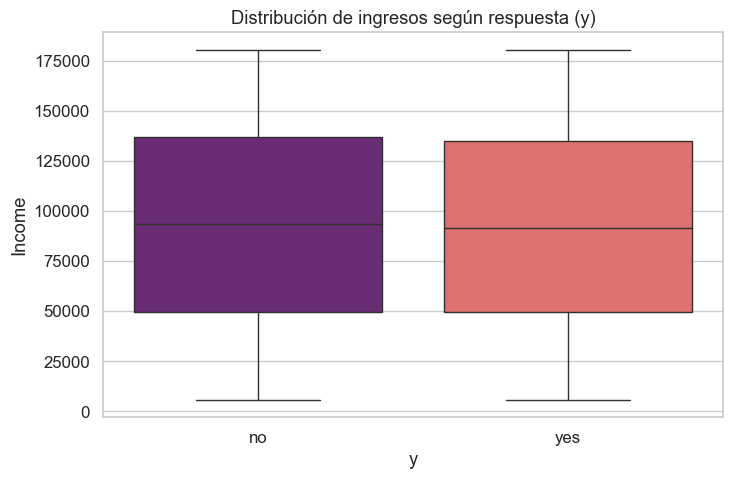

In [202]:
plt.figure(figsize=(8,5))
sns.boxplot(x="y", y="Income", hue='y', data=merged, palette="magma", legend=False)
plt.title("Distribución de ingresos según respuesta (y)")
plt.show()

NÚMERODE VISITAS WEB vs RESPUESTA (y)

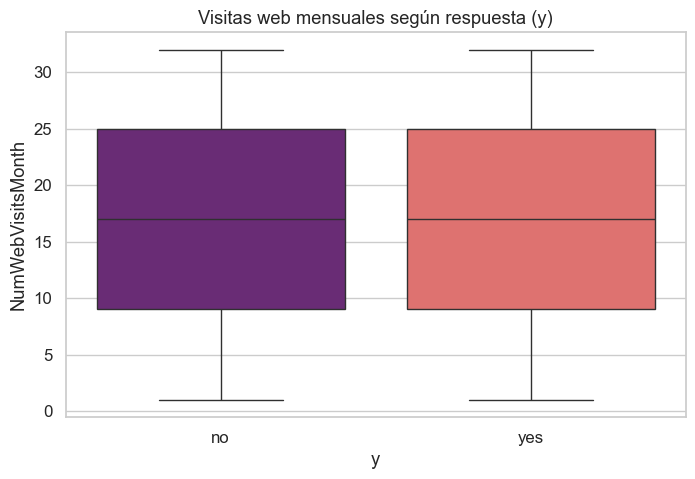

In [203]:
plt.figure(figsize=(8,5))
sns.boxplot(x="y", y="NumWebVisitsMonth", hue='y', data=merged, palette="magma", legend=False)
plt.title("Visitas web mensuales según respuesta (y)")
plt.show()

HIJOS PEQUEÑOS / ADOLESCENTES EN CASA VS RESPUESTA (y)

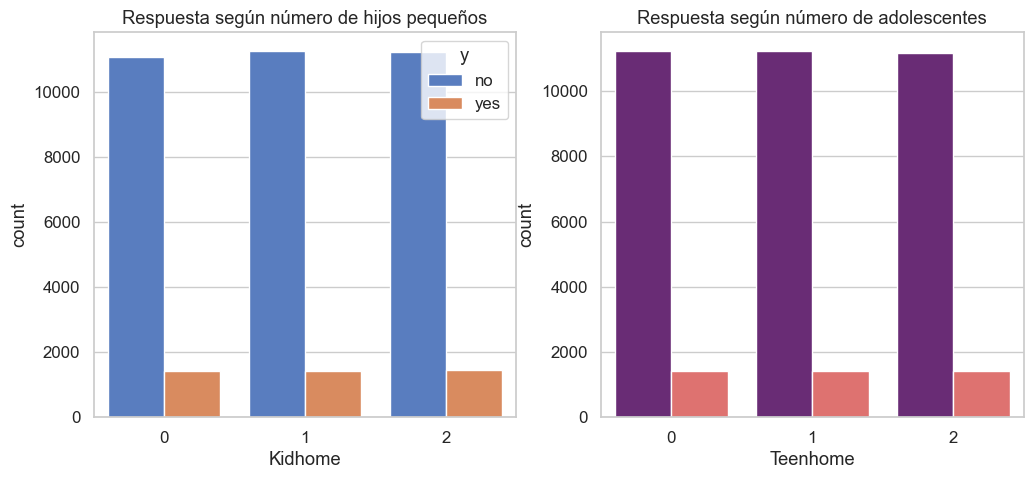

In [201]:
fig, axes = plt.subplots(1,2, figsize=(12,5))
sns.countplot(x="Kidhome", hue="y", data=merged, ax=axes[0])
axes[0].set_title("Respuesta según número de hijos pequeños")
sns.countplot(x="Teenhome", hue="y", data=merged, palette="magma", legend=False, ax=axes[1])
axes[1].set_title("Respuesta según número de adolescentes")
plt.show()

ANTIGÜEDAD DEL CLIENTE VS RESPUESTA (y)

In [194]:
# Convertir fecha a antigüedad en años
merged["Customer_Years"] = (pd.to_datetime("today") - pd.to_datetime(merged["Dt_Customer"])).dt.days / 365

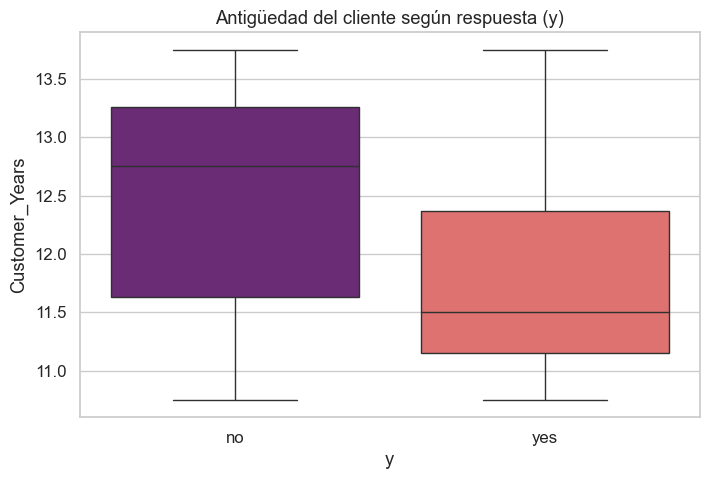

In [198]:
plt.figure(figsize=(8,5))
sns.boxplot(x="y", y="Customer_Years", hue='y', data=merged, palette="magma", legend=False)
plt.title("Antigüedad del cliente según respuesta (y)")
plt.show()

**CORRALACIÓN EXTENDIDA**

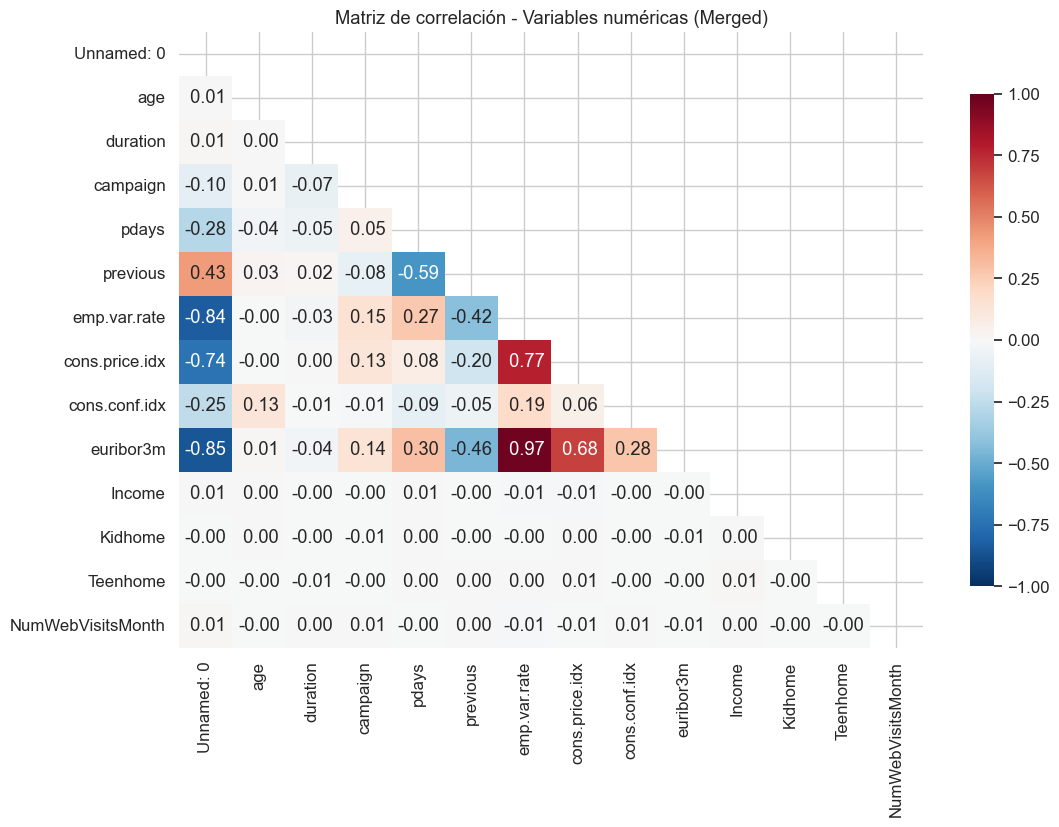

In [235]:
corr_matrix_merged = merged.corr(numeric_only=True)

plt.figure(figsize=(12,8))
mask_merged = np.triu(np.ones_like(corr_matrix_merged, dtype=bool))
sns.heatmap(corr_matrix_merged, 
            annot=True, 
            fmt=" .2f", 
            vmin=-1, vmax=1,
            mask=mask_merged,
            cbar_kws={"shrink": .8},
            cmap='RdBu_r',
            center=0)
plt.title("Matriz de correlación - Variables numéricas (Merged)")
plt.show()

Volvemos a generar otra matriz de correlación pero está vez nos quedaremos con **una sola variable representativa** de cada grupo de variables que estén muy correlacionadas (>|0.8|), y eliminar las rendundantes para que el dataset quede limpio y sin riesgo de multicolinealidad.

In [236]:
# Calculamos la matriz de correlación
corr_matrix_merged = merged.corr(numeric_only=True)

# Umbral de correlación 
umbral = 0.8

# Para guardar los grupos de correlación
grupos = []
visitadas = set()

# Recorremos la matriz
for i in range(len(corr_matrix_merged.columns)):
    if corr_matrix_merged.columns[i] not in visitadas:
        grupo = [corr_matrix_merged.columns[i]]
        for j in range(i+1, len(corr_matrix_merged.columns)):
            if abs(corr_matrix_merged.iloc[i, j]) > umbral:
                grupo.append(corr_matrix_merged.columns[j])
                visitadas.add(corr_matrix_merged.columns[j])
        if len(grupo) > 1:
            grupos.append(grupo)
    
    
print("Grupos de variables con correlación alta (>0.8):")
for g in grupos:
    print(g)    
  

Grupos de variables con correlación alta (>0.8):
['Unnamed: 0', 'emp.var.rate', 'euribor3m']


In [237]:
# Seleccionamos qué conservar y qué eliminar
to_keep = []
to_drop = []

for grupo in grupos:
    # Elegimos convervar la que tenga menos nulos
    col_keep = min(grupo, key=lambda col: merged[col].isna().sum())
    to_keep.append(col_keep)

    # El resto se eliminan
    for col in grupo:
        if col != col_keep:
            to_drop.append(col)

print("\n Variables que se conservarán:")
print(to_keep)

print("\n Variables que se eliminarán:")
print(to_drop)


 Variables que se conservarán:
['Unnamed: 0']

 Variables que se eliminarán:
['emp.var.rate', 'euribor3m']


In [238]:
# Nos aseguramos que la variable 'Unnamed: 0' no se conserve
if 'Unnamed: 0' in to_keep:
    to_keep.remove('Unnamed: 0')

if 'Unnamed: 0' not in to_drop and 'Unnamed: 0' in merged.columns:
    to_drop.append('Unnamed: 0')

In [239]:
# Se crea el dataset reducido
merged_reduced = merged.drop(columns=to_drop)

print("Shape original:", merged.shape)
print("Shape reducido:", merged_reduced.shape)

Shape original: (37871, 26)
Shape reducido: (37871, 23)


In [240]:
# Verificar los tipos de datos de todas las columnas
merged_reduced.dtypes

age                           int64
job                          object
marital                      object
education                    object
default                      object
housing                      object
loan                         object
contact                      object
duration                      int64
campaign                      int64
pdays                         int64
previous                      int64
poutcome                     object
cons.price.idx              float64
cons.conf.idx               float64
y                            object
date                         object
id_                          object
Income                        int64
Kidhome                       int64
Teenhome                      int64
Dt_Customer          datetime64[ns]
NumWebVisitsMonth             int64
dtype: object

In [241]:
# Comprobar si aún hay valores nulos
print("\nValores nulos por columna:")
print(merged_reduced.isna().sum())


Valores nulos por columna:
age                    0
job                    0
marital                0
education              0
default                0
housing                0
loan                   0
contact                0
duration               0
campaign               0
pdays                  0
previous               0
poutcome               0
cons.price.idx       412
cons.conf.idx          0
y                      0
date                 215
id_                    0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
NumWebVisitsMonth      0
dtype: int64


In [242]:
# Revisar si hay duplicados en las filas 
print("\nNúmero de filas duplicadas:", merged_reduced.duplicated().sum())


Número de filas duplicadas: 0


In [244]:
# Vista rápida de estadísticas numéricas 
print("\nResumen estadístico de variables numéricas:")
print(merged_reduced.describe().round(2))


Resumen estadístico de variables numéricas:
            age  duration  campaign     pdays  previous  cons.price.idx  \
count  37871.00  37871.00  37871.00  37871.00  37871.00        37459.00   
mean      39.98    258.10      2.57    962.48      0.17           93.58   
min       18.00      1.00      1.00      0.00      0.00           92.20   
25%       32.00    102.00      1.00    999.00      0.00           93.08   
50%       38.00    179.00      2.00    999.00      0.00           93.75   
75%       47.00    320.00      3.00    999.00      0.00           93.99   
max       98.00   4918.00     56.00    999.00      7.00           94.77   
std       10.44    259.59      2.79    186.89      0.49            0.58   

       cons.conf.idx     Income   Kidhome  Teenhome  \
count       37871.00   37871.00  37871.00  37871.00   
mean          -40.51   93453.06      1.00      1.00   
min           -50.80    5841.00      0.00      0.00   
25%           -42.70   49731.50      0.00      0.00   
50% 

In [245]:
# Vista rápida de variables categóricas 
print("\nVariables únicos en variables categóricas:")
for col in merged_reduced.select_dtypes(include=['object']).columns:
    print(f"{col}: {merged_reduced[col].nunique()} categorías")


Variables únicos en variables categóricas:
job: 12 categorías
marital: 4 categorías
education: 8 categorías
default: 3 categorías
housing: 3 categorías
loan: 3 categorías
contact: 2 categorías
poutcome: 3 categorías
y: 2 categorías
date: 1825 categorías
id_: 37871 categorías


**GUARDAMOS EL NUEVO DATAFRAME**

In [246]:
merged_reduced.to_csv('merged_EDA.csv')